In [13]:
install = True
if install:
    !pip install pandas
    !pip install numpy
    !pip install matplotlib
    !pip install seaborn

import seaborn as sns

# Evaluation of Energy Additivity in Different Molecular Systems
Leonardo Ignazio Pagliochini

HPC Student

Molecular Modelling of Materials
 
24/09/2024


## Table of Contents

1. [Abstract](#abstract)
2. [Very Important Note on the Notebook](#very-important-note-on-the-notebook)
3. [Introduction](#introduction)
4. [SCF and MP2 Comparative Analysis](#scf-and-mp2-comparative-analysis)
5. [Parallel Execution Utility](#parallel-execution-utility)
6. [Utility Functions](#utility-functions)
7. [Simulations execution](#simulations-execution)  
8. [Ar Atoms Simulation](#ar-atoms-simulation)
9. [HCl Molecules Simulation](#hcl-molecules-simulation)
10. [H2O Molecules Simulation](#h2o-molecules-simulation)
11. [Hartree-Fock plus London Dispersion Simulation](#hartree-fock-plus-london-dispersion-simulation)
12. [Conclusions And Future Work](#conclusions-and-future-work) 
13. [VMD Visualization](#vmd-visualization)

## Abstract
In this study, I evaluate the additivity of interaction energies in molecular systems composed of three molecules. Specifically, I examine how the total energy of a system of three molecules is related to the sum of pairwise interaction energies between two molecules. 

The analysis focuses on three cases: 
- three argon atoms 
- three HCl molecules
- three $H_2 O$ molecules 

evaluated using both Self-Consistent Field (SCF) methods and Møller-Plesset second-order perturbation theory (MP2). The results explore how different computational methods capture dispersion and correlation effects, and how these contributions affect the accuracy of energy additivity at various molecular distances.

The last part of the study focuses on the Hartree-Fock plus London Dispersion method, which is a combination of the Hartree-Fock method and the London dispersion correction. This method is used to evaluate the energy of the three argon atoms system and compare the results with the SCF and MP2 methods.

__The focus of the whole notebook is not only to demonstrate that the energy of a system of three molecules can not be computed as the sum of pairwise interaction energies, but also to evaluate in which case is it possible to use this calculation as an approximation for different energy estimation methods and different molecular systems.__

## Very Important Note on the Notebook
In the whole notebook design choices have been made to simplify the work. The geometries of the systems with three molecules has been defined, using constraints, in such a way that the inclination of the molecules is always the same during the simulation and as similar as possible to the two molecules case. This has been done to simplify the comparison between the two and three molecules cases. This choice may have affected the results of the simulations, especially in the case of the HCl molecules, where the dipole-dipole interaction may have been affected by the inclination of the molecules.

## Introduction 
In molecular systems, the accurate calculation of interaction energies plays a critical role in understanding the behavior and properties of matter. However, one of the key challenges in computational chemistry is the non-additivity of interaction energies, especially in multi-molecular systems. The simplest assumption would be that the energy of a system composed of multiple molecules could be approximated as the sum of pairwise interactions. While this approach might offer a reasonable approximation in systems where interactions are weak and sparse, it often breaks down in more complex systems where many-body effects are significant. This non-additivity becomes particularly evident in systems with strong intermolecular forces, such as hydrogen bonding or dipole-dipole interactions, where the cooperative and nonlinear nature of the forces defies a simple summation of two-body energies.

The distinction between two-body and many-body interactions is critical for understanding these systems. In a two-body approximation, the interaction energy between each pair of molecules is calculated independently of the others, assuming that the presence of additional molecules does not significantly affect their interaction. However, in reality, the presence of a third molecule can alter the interaction between two molecules due to changes in the electronic distribution, polarization effects, and long-range forces. This leads to the emergence of three-body, and higher-order, interaction terms that must be taken into account for an accurate description of the system’s total energy.

This issue is particularly pronounced in polar molecules like HCl, where dipole-dipole interactions can also display non-additive behavior. The theoretical methods used to compute these interaction energies, such as Hartree-Fock (SCF) and Møller-Plesset perturbation theory (MP2), handle many-body effects differently. While SCF provides a mean-field approximation that neglects explicit electron correlation, MP2 includes electron correlation, making it more accurate in many cases. However, even MP2 is not immune to errors in systems with strong intermolecular forces, as it may overestimate correlation effects, particularly in systems where cooperative interactions dominate. These complexities highlight the challenge of reliably estimating the interaction energy in multi-molecular systems and underscore the importance of using appropriate computational methods to capture the non-additivity inherent in such systems.

In this context, studying the deviations between pairwise-additive energy models and full many-body calculations offers valuable insights into the nature of intermolecular interactions. Such analyses are crucial for improving the accuracy of molecular simulations, especially in systems where traditional two-body approaches fail to capture the true energetics. Understanding the limitations of different computational methods, including the role of electron correlation and the effects of basis set size, is essential for advancing the predictive power of molecular modeling techniques.

## SCF and MP2 Comparative Analysis
The **Self-Consistent Field (SCF)** method, often synonymous with the Hartree-Fock (HF) approach, is a foundational computational technique in quantum chemistry. It solves the Schrödinger equation approximately by assuming that each electron in a molecule moves independently in the average field created by all other electrons. The SCF procedure is iterative: it starts with an initial guess for the molecular orbitals, solves the corresponding Fock equations, and updates the orbitals until the solution converges, yielding the lowest possible energy configuration consistent with that guess. While SCF captures the main features of electron-electron repulsion through the mean-field approximation, it neglects electron correlation effects—interactions arising from the instantaneous positions of electrons. Thus, SCF typically provides a reasonable approximation for the **Hartree-Fock energy**, but it fails to account for more subtle electron correlation phenomena, especially in systems with strong dispersion forces or near-degenerate electronic states.

To improve upon the limitations of SCF, **Møller-Plesset perturbation theory of second order (MP2)** introduces a correction for electron correlation effects that SCF neglects. MP2 builds on the Hartree-Fock wavefunction by treating the neglected electron correlations as a perturbation to the HF solution. This method adds a correction term to the Hartree-Fock energy, accounting for the interactions between electrons that are instantaneous rather than averaged. While the Hartree-Fock energy serves as the zeroth-order approximation, MP2 captures **dynamic correlation** effects, especially important for accurately describing van der Waals forces, dispersion, and other non-covalent interactions. By extending Hartree-Fock theory with perturbation corrections, MP2 achieves greater accuracy in predicting molecular properties and interaction energies, particularly in systems where the electron correlation plays a significant role in stabilization.

The SCF energy is always higher than the exact (or correlated) energy due to the missing correlation energy. In fact, **correlation energy** is defined as the difference between the Hartree-Fock energy and the exact energy:
$
E_{\text{corr}} = E_{\text{exact}} - E_{\text{HF}}.
$
MP2 captures a significant portion of this correlation energy, which is why it generally yields lower, and more accurate, energies than SCF.

In conclusion, SCF provides a computationally simpler but less accurate picture of molecular electronic structure, treating interactions in a mean-field manner. MP2, being a post-HF method, goes beyond this approximation by introducing second-order corrections for electron correlation, leading to improved accuracy, especially in systems where electron correlation is important. However, MP2 comes with increased computational cost due to the need to evaluate two-electron integrals over virtual and occupied orbitals, making it more demanding than SCF.

## Parallel Execution Utility

In all the simulation that follows, it will be possible to execute them in both parallel and sequantial mode: the parallel mode is recommended for the simulation of three molecules, as it will speed up the computation time.

This is done by intalling OpenMPI and linking the environmental variables to make orca able to detect and use it.

Since MPI is a message passing interface it can be possible that some parallel executions will not have a very high speedup with respect to the sequential ones due to the fact that the communication overhead can be higher than the computational time.

Note that to execute the simulations in parallel is neaded to have installed in the pc the __correct__ OpenMPI version for the ORCA software.

Note also that one limitation of orca is that, to run the simulation in parallel, is needed to use the full path to the orca executable instead of the command "orca".

To make it easier to perform the simulations in the following code it is possible to set wether to run the simulation in parallel or not by setting the variable `parallel_execution` to `True` or `False` and specifying the path to the orca executable in the variable `orca_path`.

In [14]:
parallel_execution = False

# The orca path is needed only if the parallel_execution is set to True
orca_path  = '/home/leo/orca_6_0_0/orca'

if parallel_execution:
    # Set the number of processors to be used in the parallel execution up to max(8, nprocs) where nprocs is the number of processors in the machine
    nprocs = 6

    pal = "PAL"+str(nprocs)
else: 
    pal = ""
    orca_path = 'orca'

## Utility Functions
The following code block contains utility functions that will be used throughout the notebook.

In [15]:
import re
import pandas as pd

def run_simulation(input_file):
    if simulations:
        print("Running simulation for", input_file)
        output_file = input_file.replace(".inp", ".log")
        !{orca_path} {input_file} > {output_file}  
        print("Simulation completed. Output written to", output_file)
    else:
        print("Simulation skipped for", input_file)
        print("If you want to run the simulation, set the simulations variable to True and run the cell again.")

def extract_energy_data_two_molecules(file_content, start_marker, end_marker=None):
    if end_marker:
        pattern = re.compile(rf"{start_marker}(.*?){end_marker}", re.DOTALL)
    else:
        pattern = re.compile(rf"{start_marker}(.*)", re.DOTALL)
    
    match = pattern.search(file_content)
    if match:
        data = match.group(1).strip()
        lines = data.split('\n')
        distances = []
        energies = []
        for line in lines:
            parts = line.split()
            distances.append(float(parts[0]))
            energies.append(float(parts[1]))
        return distances, energies
    return None, None

def extract_energy_data_three_molecules(file_content, start_marker, end_marker=None):
    if end_marker:
        pattern = re.compile(rf"{start_marker}(.*?){end_marker}", re.DOTALL)
    else:
        pattern = re.compile(rf"{start_marker}(.*)", re.DOTALL)
    
    match = pattern.search(file_content)
    if match:
        data = match.group(1).strip()
        lines = data.split('\n')
        distance_1 = []
        distance_2 = []
        distance_3 = []
        energies = []
        for line in lines:
            parts = line.split()
            distance_1.append(float(parts[0]))
            distance_2.append(float(parts[1]))
            distance_3.append(float(parts[2]))
            energies.append(float(parts[3]))
        return distance_1, distance_2, distance_3, energies
    return None, None

## Simulations execution
In the following code block you can choose to run or not the simulation below. If you want to run the simulation set the variable `simulations` to `True`.
Note that the simulation can take a long time to run, especially in the case of the three molecules simulation.

In [16]:
simulations = False

## Pay attention to the orca version
In the following code blocks the simulation data are extracted by the output files of the ORCA software. The data extraction is based on the output format of the __ORCA version 6.0.0__. If you are using a different version of the software, the output format may be different, and the data extraction functions may need to be adjusted accordingly.

This problem may arise only in the case in which the simulations are re-run, as the output files already present in the folder are in the correct format

## Ar Atoms Simulation
In this section, the interactions between argon atoms is explored using both SCF and MP2 methods. Argon, being a noble gas, is primarily influenced by dispersion forces, which MP2 is expected to capture more accurately than SCF. By comparing the energy results for two and three argon atoms at varying distances, the aim is to assess the additivity of pairwise interactions and highlight the differences between these computational approaches.

### Two Ar Atoms Simulation
We first generate the input file for the ORCA simulation where we can set the interval of distances to evaluate and the number of steps. The following code will write the input file for the simulation of two argon atoms at varying distances.

In [17]:
with open('AR2.inp', 'w') as f:
    code = f'''# MP2 scan of the potential energy curve for Ar...Ar
    ! MP2 aug-cc-pVTZ TightSCF opt {pal}
    %geom Scan
        B 0 1 = 2.8, 5.0, 5 # distance that will be scanned
        end
    end
    * gzmt 0 1
    Ar
    Ar  1  3.600
    *'''
    with open('AR2.inp', 'w') as f:
        f.write(code)

In the following cell the simulation of the two argon atoms is performed.

In [18]:
run_simulation('AR2.inp')

Simulation skipped for AR2.inp
If you want to run the simulation, set the simulations variable to True and run the cell again.


#### Plotting the results

CSV files have been generated.


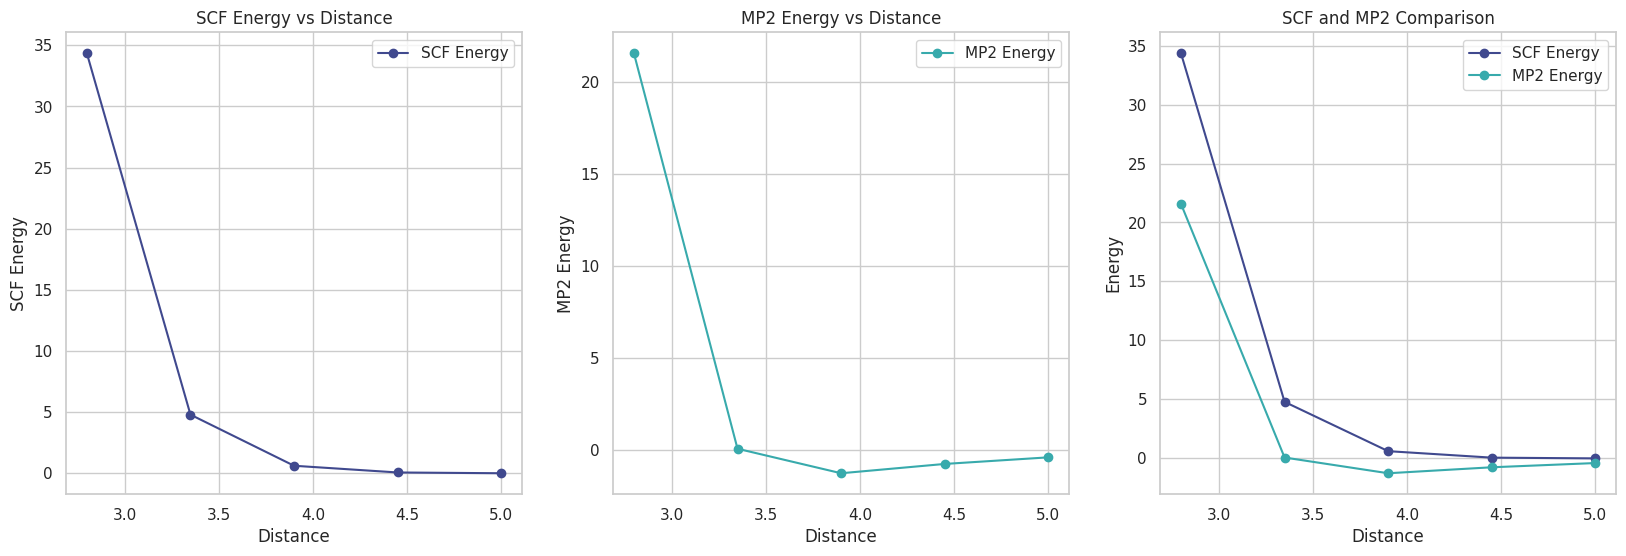

In [19]:
# Read the log file
with open("AR2.log", 'r') as file:
    content = file.read()

# Extract energy data
distances_scf, energies_scf = extract_energy_data_two_molecules(content, 
    "The Calculated Surface using the SCF energy", "The Calculated Surface using the MP2 energy")

distances_mp2, energies_mp2 = extract_energy_data_two_molecules(content, 
    "The Calculated Surface using the MP2 energy", "--------------------------------")

# Create DataFrames
df_scf_2Ar = pd.DataFrame({'dist': distances_scf, 'E': energies_scf})
df_mp2_2Ar = pd.DataFrame({'dist': distances_mp2, 'E': energies_mp2})


# Save to CSV files
df_scf_2Ar.to_csv('outAr2_SCF_Energy.csv', index=False)
df_mp2_2Ar.to_csv('outAr2_MP2_Energy.csv', index=False)

print("CSV files have been generated.")

import matplotlib.pyplot as plt

# Reference energies (in Hartree)
E1rhf = -526.81335217
E1mp2 = -527.024283310

# Conversion factor from Hartree to kJ/mol
hartree_to_kjmol = 2625.6

# Calculate relative energies
df_scf_2Ar['Interaction_Energy'] = (df_scf_2Ar['E'] - 2 * E1rhf)*hartree_to_kjmol
df_mp2_2Ar['Interaction_Energy'] = (df_mp2_2Ar['E'] - 2 * E1mp2)*hartree_to_kjmol

sns.set(style='whitegrid')
palette = sns.color_palette('mako', 2)

plt.figure(figsize=(20, 6))

# Plot SCF energy data in the first subplot
plt.subplot(1, 3, 1)
plt.plot(df_scf_2Ar['dist'], df_scf_2Ar['Interaction_Energy'], marker='o', color = palette[0], label='SCF Energy')
plt.title('SCF Energy vs Distance')
plt.xlabel('Distance')
plt.ylabel('SCF Energy')
plt.grid(True)
plt.legend()

# Plot MP2 energy data in the second subplot
plt.subplot(1, 3, 2)
plt.plot(df_mp2_2Ar['dist'], df_mp2_2Ar['Interaction_Energy'], marker='o', color = palette[1], label='MP2 Energy')
plt.title('MP2 Energy vs Distance')
plt.xlabel('Distance')
plt.ylabel('MP2 Energy')
plt.grid(True)
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(df_scf_2Ar['dist'], df_scf_2Ar['Interaction_Energy'], marker='o', color = palette[0], label='SCF Energy')
plt.plot(df_mp2_2Ar['dist'], df_mp2_2Ar['Interaction_Energy'], marker='o', color = palette[1], label='MP2 Energy')
plt.title('SCF and MP2 Comparison')
plt.xlabel('Distance')
plt.ylabel('Energy')
plt.grid(True)
plt.legend()


The first plot shows the SCF energy decreasing sharply at shorter distances before leveling off near zero as the atoms move farther apart, indicating a diminishing interaction. The second plot displays the MP2 energy, which also shows a sharp drop, but predicts lower energies at shorter distances compared to SCF, reflecting the inclusion of electron correlation in MP2. The third plot compares both methods, highlighting the significant energy difference at small distances where MP2 captures the interaction more accurately. At larger distances, the energies from both methods converge as the interaction between the argon atoms weakens. This comparison illustrates the importance of electron correlation at shorter distances in molecular systems.

### Three Ar Atoms Simulation
We now extend the simulation to three argon atoms, evaluating the total energy of the system as a function of the pairwise interactions between the atoms. The following code block generates the input file for the ORCA simulation of three argon atoms at varying distances.

In [20]:
with open('Ar3.inp', 'w') as f:
    code = f'''
    ! HF MP2 aug-cc-pVTZ TightSCF Opt {pal}

    * xyz 0 1
    Ar      0.000000     0.000000     0.000000
    Ar      2.800000     0.000000     0.000000
    Ar      1.400000     2.424871     0.000000
    *

    %geom
        Constraints
        end
        Scan
            B 0 1 = 2.8, 5, 5  
            B 1 2 = 2.8, 5, 5  
            B 2 0 = 2.8, 5, 5  
        end
    end

    %mp2
        Density relaxed
    end

    %scf
        ConvForced true  # Ensure SCF convergence
    end


    '''
    with open('Ar3.inp', 'w') as f:
        f.write(code)


In [21]:
run_simulation('Ar3.inp')

Simulation skipped for Ar3.inp
If you want to run the simulation, set the simulations variable to True and run the cell again.


#### Plotting the results

CSV files have been generated.


/tmp/ipykernel_1637852/708778091.py:60: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax1.scatter(df_scf_toplot['dist_2'], df_scf_toplot['dist_3'], df_scf_toplot['Interaction_Energy'], c = palette[0], marker='o', label='SCF Energy')
/tmp/ipykernel_1637852/708778091.py:69: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax2.scatter(df_mp2_toplot['dist_2'], df_mp2_toplot['dist_3'], df_mp2_toplot['Interaction_Energy'], c = palett

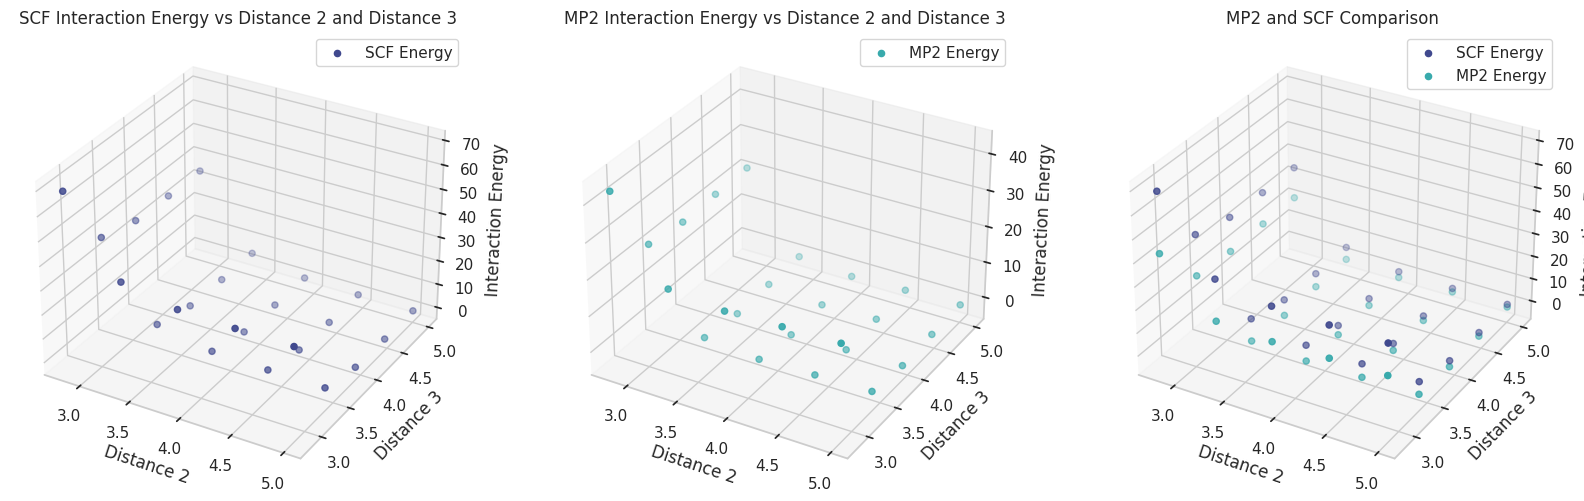

In [22]:
constantDist = 5

# Read the log file

import re
import pandas as pd

with open('Ar3.log', 'r') as file:
    content = file.read()

# Extract energy data
distance_1_scf, distance_2_scf, distance_3_scf, energies_scf_3Ar = extract_energy_data_three_molecules(content, 
    "The Calculated Surface using the SCF energy", "The Calculated Surface using the MP2 energy")

distance_1_mp2, distance_2_mp2, distance_3_mp2, energies_mp2_3Ar = extract_energy_data_three_molecules(content,
    "The Calculated Surface using the MP2 energy", "--------------------------------")

# Create DataFrames
df_scf_3Ar = pd.DataFrame({'dist_1': distance_1_scf,'dist_2': distance_2_scf, 'dist_3': distance_3_scf, 'E': energies_scf_3Ar})
df_mp2_3Ar = pd.DataFrame({'dist_1': distance_1_mp2,'dist_2': distance_2_mp2, 'dist_3': distance_3_mp2, 'E': energies_mp2_3Ar})

#df_mp2 = pd.DataFrame({'dist': distances_mp2, 'E': energies_mp2})

# Save to CSV files
df_scf_3Ar.to_csv('AR3_SCF_Energy.csv', index=False)
df_mp2_3Ar.to_csv('AR3_MP2_Energy.csv', index=False)

print("CSV files have been generated.")

import matplotlib.pyplot as plt

# Reference energies (in Hartree)
E1rhf = -526.813352170
E1mp2 = -527.024283310

# Conversion factor from Hartree to kJ/mol
hartree_to_kjmol = 2625.6

# Calculate relative energies
df_scf_3Ar['Interaction_Energy'] = (df_scf_3Ar['E'] - 3 * E1rhf)*hartree_to_kjmol
df_mp2_3Ar['Interaction_Energy'] = (df_mp2_3Ar['E'] - 3 * E1mp2)*hartree_to_kjmol

# Let us select only the rows of the energies whete distance_1 is equal to constantDist
df_scf_toplot = df_scf_3Ar[df_scf_3Ar['dist_1'] == constantDist]
df_mp2_toplot= df_mp2_3Ar[df_mp2_3Ar['dist_1'] == constantDist]

# now using a 3d representation plot the energies as a function of the other two distances
# Plot SCF energy data
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

sns.set(style='whitegrid')
palette = sns.color_palette('mako', 2)

# Create a figure with two subplots side by side
fig = plt.figure(figsize=(20, 6))

# Plot SCF energy data in the first subplot
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(df_scf_toplot['dist_2'], df_scf_toplot['dist_3'], df_scf_toplot['Interaction_Energy'], c = palette[0], marker='o', label='SCF Energy')
ax1.set_xlabel('Distance 2')
ax1.set_ylabel('Distance 3')
ax1.set_zlabel('Interaction Energy')
ax1.set_title('SCF Interaction Energy vs Distance 2 and Distance 3')
ax1.legend()

# Plot MP2 energy data in the second subplot
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(df_mp2_toplot['dist_2'], df_mp2_toplot['dist_3'], df_mp2_toplot['Interaction_Energy'], c = palette[1], marker='o', label='MP2 Energy')
ax2.set_xlabel('Distance 2')
ax2.set_ylabel('Distance 3')
ax2.set_zlabel('Interaction Energy')
ax2.set_title('MP2 Interaction Energy vs Distance 2 and Distance 3')
ax2.legend()

ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(df_scf_toplot['dist_2'], df_scf_toplot['dist_3'], df_scf_toplot['Interaction_Energy'], c = palette[0], marker='o', label='SCF Energy')
ax3.scatter(df_mp2_toplot['dist_2'], df_mp2_toplot['dist_3'], df_mp2_toplot['Interaction_Energy'], c = palette[1], marker='o', label='MP2 Energy')
ax3.set_xlabel('Distance 2')
ax3.set_ylabel('Distance 3')
ax3.set_zlabel('Interaction Energy')
ax3.set_title('MP2 and SCF Comparison')
ax3.legend()


plt.show()

The plots above represent the interaction energies for a system of three argon atoms, where the distance between two of the argons is varied (Distance 2 and Distance 3) while one distance remains fixed. In the first plot, the SCF interaction energy shows a higher range of values, reaching up to 70 kjmol, and exhibits greater variation depending on the relative distances of the two argons. The MP2 energy, in contrast, shown in the second plot, predicts consistently lower interaction energies, peaking around 40 kjmol, and is more sensitive to electron correlation, similar to the two-argon case.

In the third plot, comparing SCF and MP2 directly, we see that the SCF method continues to overestimate the interaction energy at shorter distances (lower values of Distance 2 and Distance 3), while MP2 provides more accurate, lower-energy predictions due to its inclusion of electron correlation. Both methods, however, show convergence at longer distances, where the interaction between the atoms weakens, similar to the behavior observed in the two-argon case.

Thus, we arrive at a similar conclusion as in the two-argon system: MP2 captures electron correlation more effectively, yielding more accurate results at shorter distances. However, as the distances between atoms increase, both methods tend to converge, as the atomic interactions become negligible.

### Evaluation of Energy Additivity in the Ar Case

In [23]:
print_differences = False

for index,row in df_scf_3Ar.iterrows():
    dist1 = row['dist_1']
    dist2 = row['dist_2']
    dist3 = row['dist_3']
    energy = row['Interaction_Energy']

    # Calculate the sum of energies from df_scf_2Ar for the three distances
    energy_sum_2Ar = (
        df_scf_2Ar[df_scf_2Ar['dist'] == dist1]['Interaction_Energy'].values[0] +
        df_scf_2Ar[df_scf_2Ar['dist'] == dist2]['Interaction_Energy'].values[0] +
        df_scf_2Ar[df_scf_2Ar['dist'] == dist3]['Interaction_Energy'].values[0]
    )
    if print_differences:
        # Print the interaction energy from df_scf and the sum from df_scf_2Ar
        print(f"Distances: ({dist1}, {dist2}, {dist3})")
        print(f"Interaction Energy (df_scf): {energy}")
        print(f"Sum of Interaction Energies (df_scf_2Ar): {energy_sum_2Ar}")
        print(f"Non-additivity check: {energy} != {energy_sum_2Ar}\n")


In [24]:
print_differences = False

for index,row in df_mp2_3Ar.iterrows():
    dist1 = row['dist_1']
    dist2 = row['dist_2']
    dist3 = row['dist_3']
    energy = row['Interaction_Energy']

    # Calculate the sum of energies from df_mp2_2Ar for the three distances
    energy_sum_2Ar = (
        df_mp2_2Ar[df_mp2_2Ar['dist'] == dist1]['Interaction_Energy'].values[0] +
        df_mp2_2Ar[df_mp2_2Ar['dist'] == dist2]['Interaction_Energy'].values[0] +
        df_mp2_2Ar[df_mp2_2Ar['dist'] == dist3]['Interaction_Energy'].values[0]
    )
    if print_differences:
        # Print the interaction energy from df_mp2 and the sum from df_mp2_2Ar
        print(f"Distances: ({dist1}, {dist2}, {dist3})")
        print(f"Interaction Energy (df_mp2): {energy}")
        print(f"Sum of Interaction Energies (df_mp2_2Ar): {energy_sum_2Ar}")
        print(f"Non-additivity check: {energy} != {energy_sum_2Ar}\n")

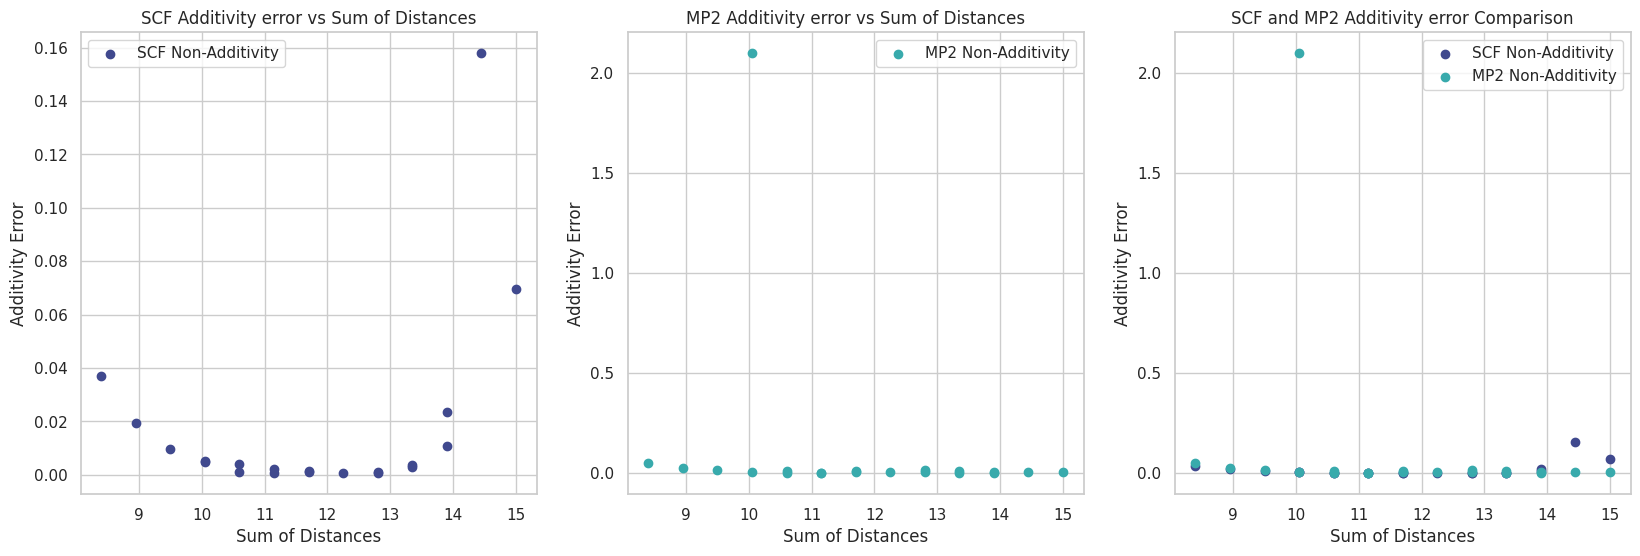

In [25]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the non-additivity for SCF data using .apply() to ensure proper alignment
df_scf_3Ar['Non-Additivity'] = df_scf_3Ar.apply(
    lambda row: row['Interaction_Energy'] - (
        df_scf_2Ar[df_scf_2Ar['dist'] == row['dist_1']]['Interaction_Energy'].values[0] +
        df_scf_2Ar[df_scf_2Ar['dist'] == row['dist_2']]['Interaction_Energy'].values[0] +
        df_scf_2Ar[df_scf_2Ar['dist'] == row['dist_3']]['Interaction_Energy'].values[0]
    ),
    axis=1
)

df_scf_3Ar['Non-Additivity'] = df_scf_3Ar['Non-Additivity'].apply(lambda x: abs(x)) / np.abs(df_scf_3Ar['Interaction_Energy'])

# Calculate the non-additivity for MP2 data using .apply() to ensure proper alignment
df_mp2_3Ar['Non-Additivity'] = df_mp2_3Ar.apply(
    lambda row: row['Interaction_Energy'] - (
        df_mp2_2Ar[df_mp2_2Ar['dist'] == row['dist_1']]['Interaction_Energy'].values[0] +
        df_mp2_2Ar[df_mp2_2Ar['dist'] == row['dist_2']]['Interaction_Energy'].values[0] +
        df_mp2_2Ar[df_mp2_2Ar['dist'] == row['dist_3']]['Interaction_Energy'].values[0]
    ),
    axis=1
)

df_mp2_3Ar['Non-Additivity'] = df_mp2_3Ar['Non-Additivity'].apply(lambda x: abs(x)) / np.abs(df_mp2_3Ar['Interaction_Energy'])
# Calculate the sum of distances for SCF data
df_scf_3Ar['Sum_Distances'] = df_scf_3Ar['dist_1'] + df_scf_3Ar['dist_2'] + df_scf_3Ar['dist_3']

# Calculate the sum of distances for MP2 data
df_mp2_3Ar['Sum_Distances'] = df_mp2_3Ar['dist_1'] + df_mp2_3Ar['dist_2'] + df_mp2_3Ar['dist_3']

df_scf_3Ar_toplot = df_scf_3Ar.groupby('Sum_Distances')['Non-Additivity'].mean().reset_index()
df_mp2_3Ar_toplot = df_mp2_3Ar.groupby('Sum_Distances')['Non-Additivity'].mean().reset_index()

sns.set(style='whitegrid')
palette = sns.color_palette('mako', 2)

# Plot the non-additivity as a function of the sum of the distances
plt.figure(figsize=(20, 6))

# Plot SCF non-additivity data in the first subplot as a scatter plot
plt.subplot(1, 3, 1)
plt.scatter(df_scf_3Ar_toplot['Sum_Distances'], df_scf_3Ar_toplot['Non-Additivity'], marker='o', color=palette[0], label='SCF Non-Additivity')
plt.title('SCF Additivity error vs Sum of Distances')
plt.xlabel('Sum of Distances')
plt.ylabel('Additivity Error')
plt.grid(True)
plt.legend()

# Plot MP2 non-additivity data in the second subplot as a scatter plot
plt.subplot(1, 3, 2)
plt.scatter(df_mp2_3Ar_toplot['Sum_Distances'], df_mp2_3Ar_toplot['Non-Additivity'], marker='o', color=palette[1], label='MP2 Non-Additivity')
plt.title('MP2 Additivity error vs Sum of Distances')
plt.xlabel('Sum of Distances')
plt.ylabel('Additivity Error')
plt.grid(True)
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(df_scf_3Ar_toplot['Sum_Distances'], df_scf_3Ar_toplot['Non-Additivity'], marker='o', color=palette[0], label='SCF Non-Additivity')
plt.scatter(df_mp2_3Ar_toplot['Sum_Distances'], df_mp2_3Ar_toplot['Non-Additivity'], marker='o', color=palette[1], label='MP2 Non-Additivity')
plt.title('SCF and MP2 Additivity error Comparison')
plt.xlabel('Sum of Distances')
plt.ylabel('Additivity Error')
plt.grid(True)
plt.legend()

# Save the combined figure
plt.savefig('Non-Additivity_vs_Sum_of_Distances_Scatter.png')

plt.show()

In [26]:
print("Error norm for SCF data:", round(df_scf_3Ar['Non-Additivity'].mean() * 100), "%")
print("Error norm for MP2 data:", round(df_mp2_3Ar['Non-Additivity'].mean() * 100), "%")

Error norm for SCF data: 1 %
Error norm for MP2 data: 14 %


The plots above display the additivity errors when approximating the total interaction energy of a three-argon system using a pairwise additive scheme. The SCF (Self-Consistent Field) and MP2 (Møller-Plesset second-order perturbation theory) additivity errors are plotted against the sum of the distances between the argon atoms.

The SCF additivity error (left plot) shows that while the error remains mostly small, it increases a bit at larger sums of distances, reaching up to 0.16. In contrast, the MP2 additivity error (middle plot) stays consistently close to zero, showing little to no variation, regardless of the sum of distances. The third plot, comparing both methods, highlights this difference, showing that SCF has a more significant additivity error, particularly for larger distances.

The error norm calculated indicates that SCF data has a lower mean error (1%) compared to MP2 (14%). This suggests that SCF energy is better approximated by pairwise additivity. The reason SCF is approximated more accurately likely lies in the fact that SCF does not include electron correlation, which simplifies the interaction model. On the other hand, MP2 accounts for electron correlation, which introduces more complex interactions that are less easily captured by a pairwise additive scheme. This leads to higher non-additivity errors for MP2.

### Comments on the Ar Atoms Simulation
The analysis of argon interactions using both SCF (Self-Consistent Field) and MP2 (Møller-Plesset second-order perturbation theory) methods across different configurations—ranging from two to three argon atoms—provides valuable insights into the accuracy and limitations of these computational approaches.

For two argons, both SCF and MP2 energies decrease as the interatomic distance increases, with MP2 consistently predicting lower energies due to its inclusion of electron correlation. This highlights the importance of electron correlation in accurately modeling short-range interactions. As the distance between the argon atoms grows, the energies computed by both methods converge, indicating that electron correlation effects become negligible at larger separations.

In the case of three argons, a similar trend is observed: MP2 captures the interaction more accurately at shorter distances, while SCF tends to overestimate the energy. When examining non-additivity errors, it is clear that the SCF method can be reasonably approximated using pairwise additive schemes, with only a small error (1%), because it neglects electron correlation. However, MP2, which includes these correlations, shows higher non-additivity errors (14%), meaning pairwise approximation is not as effective in this case due to the more complex interaction landscape.


## HCl Molecules Simulation
In this section, we investigate the interactions between $HCl$ molecules using SCF and MP2 methods. The $HCl$ system presents a polar covalent bond, where the electronegativity difference between hydrogen and chlorine leads to a dipole moment. By comparing the energy results for two and three $HCl$ molecules at varying distances, we aim to assess the additivity of pairwise interactions and the impact of electron correlation effects on the total energy of the system.

In [27]:
with open('HCl2.inp', 'w') as f:
    code = f'''
    ! HF MP2 aug-cc-pVTZ TightSCF Opt {pal}
     
    * xyz 0 1
    Cl      1.104182     0.637500     0.000000 
    H       0.000000     0.000000     0.000000 

    Cl      3.904182     0.637500     0.000000
    H       5.008364     0.000000     0.000000 
    *

    %geom
        Constraints
            {{ B 1 0 C }}  # Fix H-Cl bond distance in the first HCl
            {{ B 3 2 C }}  # Fix H-Cl bond distance in the second HCl
            {{ A 2 0 1 C }}  # Fix the H1-Cl1-Cl3 angle
            {{ A 0 2 3 C }}  # Fix the H2-Cl2-Cl3 angle
            
        end
        Scan
            B 1 2 = 2.8, 5, 5  # Vary the Cl-Cl distance
        end
    end
 
    %mp2
        Density relaxed
    end

    %scf
        ConvForced true  # Ensure SCF convergence
    end

    '''
    with open('HCl2.inp', 'w') as f:
        f.write(code)


In [28]:
run_simulation('HCl2.inp')

Simulation skipped for HCl2.inp
If you want to run the simulation, set the simulations variable to True and run the cell again.


#### Plotting the results

CSV files have been generated.


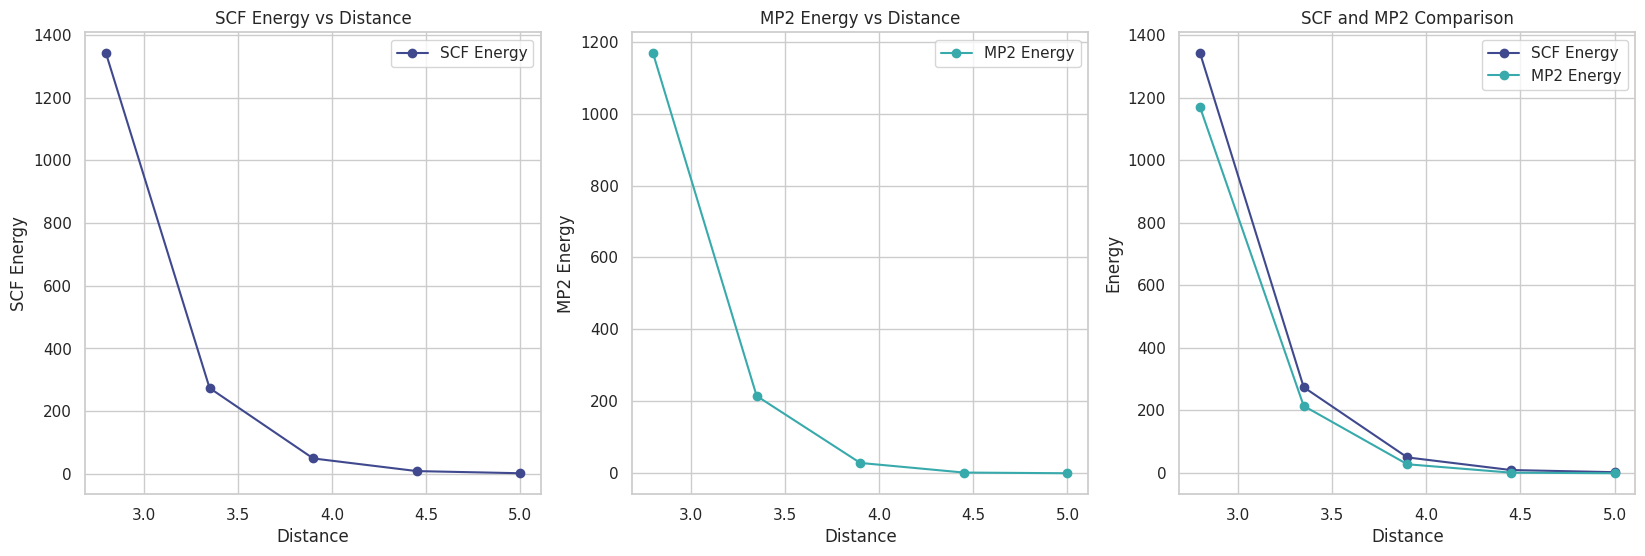

In [29]:
# Read the log file
with open("HCl2.log", 'r') as file:
    content = file.read()

# Extract energy data
distances_scf, energies_scf = extract_energy_data_two_molecules(content, 
    "The Calculated Surface using the SCF energy", "The Calculated Surface using the MP2 energy")

distances_mp2, energies_mp2 = extract_energy_data_two_molecules(content, 
    "The Calculated Surface using the MP2 energy", "--------------------------------")

# Create DataFrames
df_scf_HCl2 = pd.DataFrame({'dist': distances_scf, 'E': energies_scf})
df_mp2_HCl2 = pd.DataFrame({'dist': distances_mp2, 'E': energies_mp2})


# Save to CSV files
df_scf_HCl2.to_csv('outHCl3_SCF_Energy.csv', index=False)
df_mp2_HCl2.to_csv('outHCl3_MP2_Energy.csv', index=False)

print("CSV files have been generated.")

import matplotlib.pyplot as plt

# Reference energies (in Hartree)
E1rhf = -460.1075955091031915
E1mp2 = -460.315130056

# Conversion factor from Hartree to kJ/mol
hartree_to_kjmol = 2625.6

# Calculate relative energies
df_scf_HCl2['Interaction_Energy'] = (df_scf_HCl2['E'] - 2 * E1rhf)*hartree_to_kjmol
df_mp2_HCl2['Interaction_Energy'] = (df_mp2_HCl2['E'] - 2 * E1mp2)*hartree_to_kjmol

sns.set(style='whitegrid')
palette = sns.color_palette('mako', 2)

plt.figure(figsize=(20, 6))

# Plot SCF energy data in the first subplot
plt.subplot(1, 3, 1)
plt.plot(df_scf_HCl2['dist'], df_scf_HCl2['Interaction_Energy'], marker='o', color=palette[0], label='SCF Energy')
plt.title('SCF Energy vs Distance')
plt.xlabel('Distance')
plt.ylabel('SCF Energy')
plt.grid(True)
plt.legend()

# Plot MP2 energy data in the second subplot
plt.subplot(1, 3, 2)
plt.plot(df_mp2_HCl2['dist'], df_mp2_HCl2['Interaction_Energy'], marker='o', color=palette[1], label='MP2 Energy')
plt.title('MP2 Energy vs Distance')
plt.xlabel('Distance')
plt.ylabel('MP2 Energy')
plt.grid(True)
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(df_scf_HCl2['dist'], df_scf_HCl2['Interaction_Energy'], marker='o',color=palette[0], label='SCF Energy')
plt.plot(df_mp2_HCl2['dist'], df_mp2_HCl2['Interaction_Energy'], marker='o', color=palette[1], label='MP2 Energy')
plt.title('SCF and MP2 Comparison')
plt.xlabel('Distance')
plt.ylabel('Energy')
plt.grid(True)
plt.legend()
plt.show()

Also in the case of HCl molecules the SCF and MP2 energies show a similar trend to the argon atoms, with SCF overestimating the interaction energy at shorter distances and MP2 providing more accurate predictions due to electron correlation effects. Note that in this case the energie vaues are so much higher than the argon atoms case.



### Three HCl Molecules Simulation

In [30]:
with open('HCl3.inp', 'w') as f:
    code = f'''! HF MP2 aug-cc-pVTZ LooseSCF Opt {pal}

    * xyz 0 1
    Cl      1.104182     0.637500     0.000000  # Cl of Molecule 1
    H       0.000000     0.000000     0.000000  # H of Molecule 1

    Cl      3.904182     0.637500     0.000000  # Cl of Molecule 2 (initial Cl-Cl distance between Molecule 1 and 2)
    H       5.008364     0.000000     0.000000  # H of Molecule 2

    Cl      2.504182     3.062371     0.000000  # Cl of Molecule 3 (form a triangle)
    H       2.504182     4.337371     0.000000  # H of Molecule 3
    *

    %geom
        Constraints
            {{ B 1 0 C }}  # Fix H-Cl bond distance in the first HCl
            {{ B 3 2 C }}  # Fix H-Cl bond distance in the second HCl
            {{ B 5 4 C }}  # Fix H-Cl bond distance in the third HCl
            {{ A 2 0 1 C }}  # Fix the H1-Cl1-Cl3 angle
            {{ A 0 2 3 C }}  # Fix the H2-Cl2-Cl3 angle
            {{ A 2 4 5 C }}  # Fix the H3-Cl3-Cl1 angle


        end
        Scan
            B 0 2 = 2.8, 5, 5  # Vary the Cl1-Cl2 distance
            B 2 4 = 2.8, 5, 5  # Vary the Cl1-Cl3 distance
            B 4 0 = 2.8, 5, 5  # Vary the Cl2-Cl3 distance
        end
    end

    %mp2
        Density relaxed
    end

    %scf
        ConvForced true  # Ensure SCF convergence
    end

    '''
    with open('HCl3.inp', 'w') as f:
        f.write(code)


In [31]:
run_simulation('HCl3.inp')

Simulation skipped for HCl3.inp
If you want to run the simulation, set the simulations variable to True and run the cell again.


#### Plotting the results

CSV files have been generated.


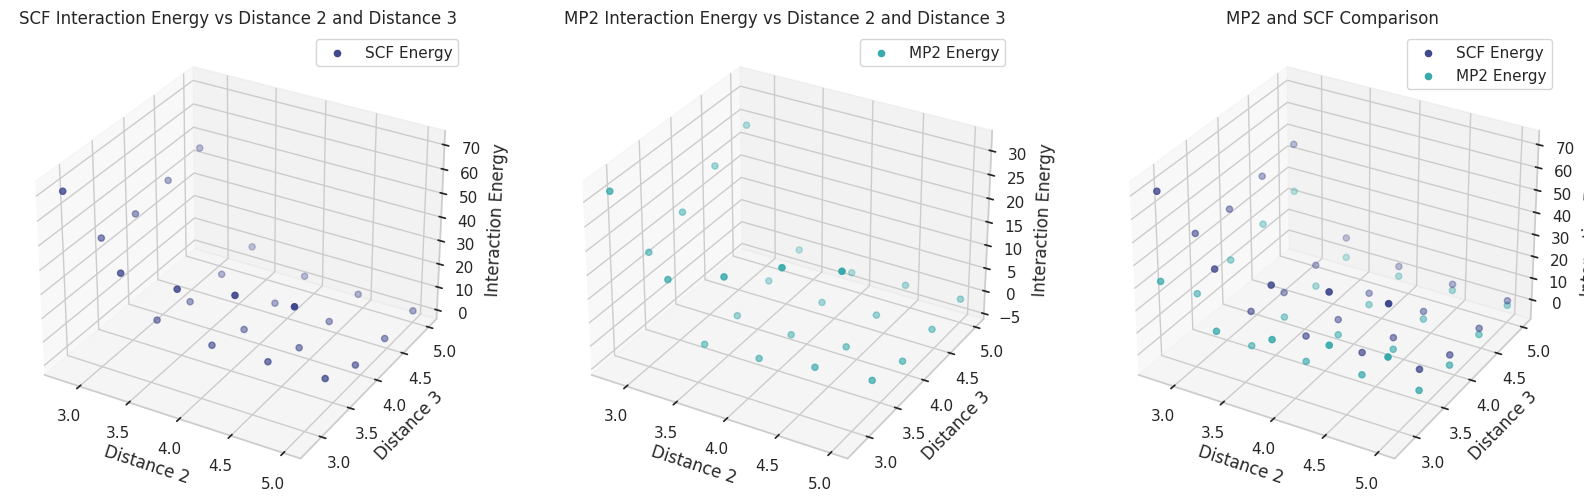

In [32]:
constantDist = 5

# Read the log file

import re
import pandas as pd

with open('HCl3.log', 'r') as file:
    content = file.read()

# Extract energy data
distance_1_scf, distance_2_scf, distance_3_scf, energies_scf_HCl3 = extract_energy_data_three_molecules(content, 
    "The Calculated Surface using the SCF energy", "The Calculated Surface using the MP2 energy")

distance_1_mp2, distance_2_mp2, distance_3_mp2, energies_mp2_HCl3 = extract_energy_data_three_molecules(content,
    "The Calculated Surface using the MP2 energy", "--------------------------------")

# Create DataFrames
df_scf_HCl3 = pd.DataFrame({'dist_1': distance_1_scf,'dist_2': distance_2_scf, 'dist_3': distance_3_scf, 'E': energies_scf_HCl3})
df_mp2_HCl3 = pd.DataFrame({'dist_1': distance_1_mp2,'dist_2': distance_2_mp2, 'dist_3': distance_3_mp2, 'E': energies_mp2_HCl3})

#df_mp2 = pd.DataFrame({'dist': distances_mp2, 'E': energies_mp2})

# Save to CSV files
df_scf_HCl3.to_csv('HCl3_SCF_Energy.csv', index=False)
df_mp2_HCl3.to_csv('HCl3_MP2_Energy.csv', index=False)

df_scf_HCl3 = pd.read_csv('HCl3_SCF_Energy.csv')
df_mp2_HCl3 = pd.read_csv('HCl3_MP2_Energy.csv')

print("CSV files have been generated.")

import matplotlib.pyplot as plt

# Reference energies (in Hartree)
E1rhf = -460.1075955091031915
E1mp2 = -460.315130056

# Conversion factor from Hartree to kJ/mol
hartree_to_kjmol = 2625.6

# Calculate relative energies
df_scf_HCl3['Interaction_Energy'] = (df_scf_HCl3['E'] - 3 * E1rhf)*hartree_to_kjmol
df_mp2_HCl3['Interaction_Energy'] = (df_mp2_HCl3['E'] - 3 * E1mp2)*hartree_to_kjmol

# Let us select only the rows of the energies whete distance_1 is equal to constantDist
df_scf_toplot = df_scf_HCl3[df_scf_HCl3['dist_1'] == constantDist]
df_mp2_toplot= df_mp2_HCl3[df_mp2_HCl3['dist_1'] == constantDist]

# now using a 3d representation plot the energies as a function of the other two distances
# Plot SCF energy data
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

sns.set(style='whitegrid')
palette = sns.color_palette('mako', 2)

# Create a figure with two subplots side by side
fig = plt.figure(figsize=(20, 6))

# Plot SCF energy data in the first subplot
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(df_scf_toplot['dist_2'], df_scf_toplot['dist_3'], df_scf_toplot['Interaction_Energy'], marker='o', color=palette[0], label='SCF Energy')
ax1.set_xlabel('Distance 2')
ax1.set_ylabel('Distance 3')
ax1.set_zlabel('Interaction Energy')
ax1.set_title('SCF Interaction Energy vs Distance 2 and Distance 3')
ax1.legend()

# Plot MP2 energy data in the second subplot
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(df_mp2_toplot['dist_2'], df_mp2_toplot['dist_3'], df_mp2_toplot['Interaction_Energy'], color=palette[1], marker='o', label='MP2 Energy')
ax2.set_xlabel('Distance 2')
ax2.set_ylabel('Distance 3')
ax2.set_zlabel('Interaction Energy')
ax2.set_title('MP2 Interaction Energy vs Distance 2 and Distance 3')
ax2.legend()

ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(df_scf_toplot['dist_2'], df_scf_toplot['dist_3'], df_scf_toplot['Interaction_Energy'], color=palette[0], marker='o', label='SCF Energy')
ax3.scatter(df_mp2_toplot['dist_2'], df_mp2_toplot['dist_3'], df_mp2_toplot['Interaction_Energy'], color=palette[1], marker='o', label='MP2 Energy')
ax3.set_xlabel('Distance 2')
ax3.set_ylabel('Distance 3')
ax3.set_zlabel('Interaction Energy')
ax3.set_title('MP2 and SCF Comparison')
ax3.legend()

# Save the combined figure
plt.savefig('3D_Plot_Side_by_Side.png')
plt.show()

### Evaluation of Energy Additivity in the HCl Case

In [33]:
print_differences = False

for index,row in df_scf_HCl3.iterrows():
    dist1 = row['dist_1']
    dist2 = row['dist_2']
    dist3 = row['dist_3']
    energy = row['Interaction_Energy']

    # Calculate the sum of energies from df_scf_HCl2 for the three distances
    energy_sum_HCl2 = (
        df_scf_HCl2[df_scf_HCl2['dist'] == dist1]['Interaction_Energy'].values[0] +
        df_scf_HCl2[df_scf_HCl2['dist'] == dist2]['Interaction_Energy'].values[0] +
        df_scf_HCl2[df_scf_HCl2['dist'] == dist3]['Interaction_Energy'].values[0]
    )

    if print_differences:
        # Print the interaction energy from df_scf and the sum from df_scf_HCl2
        print(f"Distances: ({dist1}, {dist2}, {dist3})")
        print(f"Interaction Energy (df_scf): {energy}")
        print(f"Sum of Interaction Energies (df_scf_HCl2): {energy_sum_HCl2}")
        print(f"Non-additivity check: {energy} != {energy_sum_HCl2}\n")


In [34]:
print_differences = False

for index,row in df_mp2_HCl3.iterrows():
    dist1 = row['dist_1']
    dist2 = row['dist_2']
    dist3 = row['dist_3']
    energy = row['Interaction_Energy']

    # Calculate the sum of energies from df_mp2_HCl2 for the three distances
    energy_sum_HCl2 = (
        df_mp2_HCl2[df_mp2_HCl2['dist'] == dist1]['Interaction_Energy'].values[0] +
        df_mp2_HCl2[df_mp2_HCl2['dist'] == dist2]['Interaction_Energy'].values[0] +
        df_mp2_HCl2[df_mp2_HCl2['dist'] == dist3]['Interaction_Energy'].values[0]
    )

    if print_differences:
        # Print the interaction energy from df_mp2 and the sum from df_mp2_HCl2
        print(f"Distances: ({dist1}, {dist2}, {dist3})")
        print(f"Interaction Energy (df_mp2): {energy}")
        print(f"Sum of Interaction Energies (df_mp2_HCl2): {energy_sum_HCl2}")
        print(f"Non-additivity check: {energy} != {energy_sum_HCl2}\n")

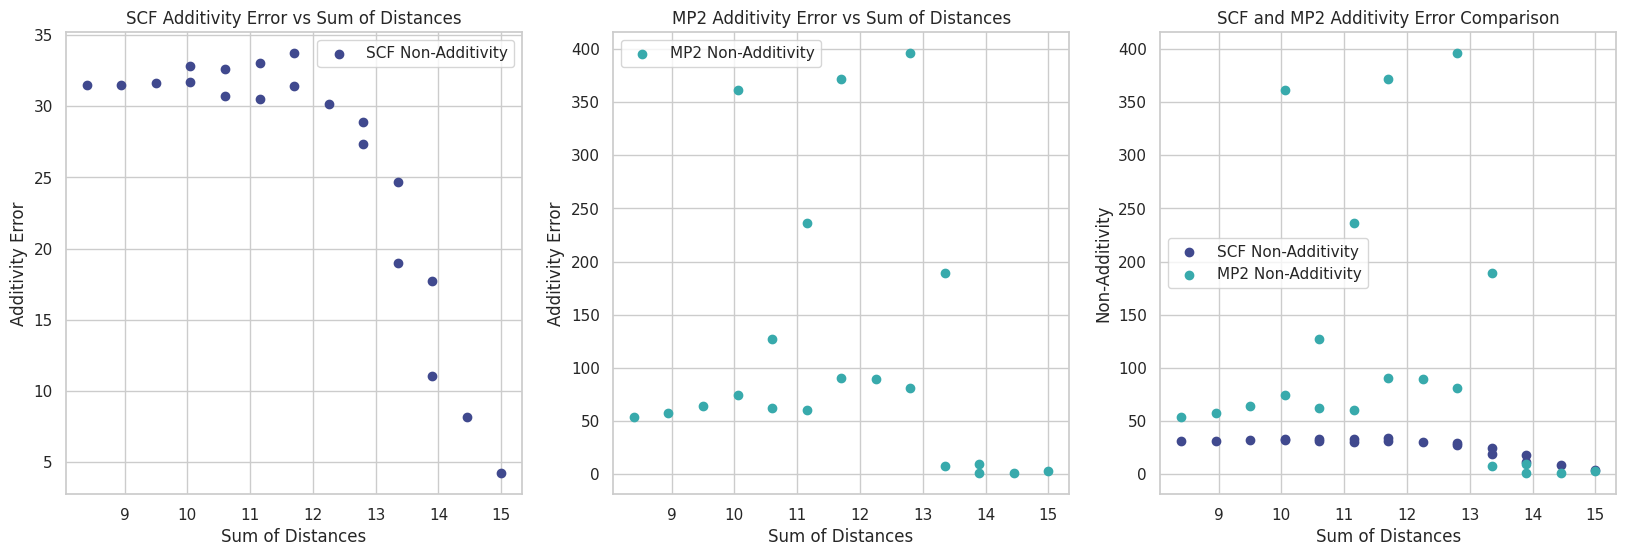

In [35]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the non-additivity for SCF data using .apply() to ensure proper alignment
df_scf_HCl3['Non-Additivity'] = df_scf_HCl3.apply(
    lambda row: row['Interaction_Energy'] - (
        df_scf_HCl2[df_scf_HCl2['dist'] == row['dist_1']]['Interaction_Energy'].values[0] +
        df_scf_HCl2[df_scf_HCl2['dist'] == row['dist_2']]['Interaction_Energy'].values[0] +
        df_scf_HCl2[df_scf_HCl2['dist'] == row['dist_3']]['Interaction_Energy'].values[0]
    ),
    axis=1
)

df_scf_HCl3['Non-Additivity'] = df_scf_HCl3['Non-Additivity'].apply(lambda x: abs(x)) / np.abs(df_scf_HCl3['Interaction_Energy'])

# Calculate the non-additivity for MP2 data using .apply() to ensure proper alignment
df_mp2_HCl3['Non-Additivity'] = df_mp2_HCl3.apply(
    lambda row: row['Interaction_Energy'] - (
        df_mp2_HCl2[df_mp2_HCl2['dist'] == row['dist_1']]['Interaction_Energy'].values[0] +
        df_mp2_HCl2[df_mp2_HCl2['dist'] == row['dist_2']]['Interaction_Energy'].values[0] +
        df_mp2_HCl2[df_mp2_HCl2['dist'] == row['dist_3']]['Interaction_Energy'].values[0]
    ),
    axis=1
)

df_mp2_HCl3['Non-Additivity'] = df_mp2_HCl3['Non-Additivity'].apply(lambda x: abs(x)) / np.abs(df_mp2_HCl3['Interaction_Energy'])
# Calculate the sum of distances for SCF data
df_scf_HCl3['Sum_Distances'] = df_scf_HCl3['dist_1'] + df_scf_HCl3['dist_2'] + df_scf_HCl3['dist_3']

# Calculate the sum of distances for MP2 data
df_mp2_HCl3['Sum_Distances'] = df_mp2_HCl3['dist_1'] + df_mp2_HCl3['dist_2'] + df_mp2_HCl3['dist_3']

df_scf_HCl3_toplot = df_scf_HCl3.groupby('Sum_Distances')['Non-Additivity'].mean().reset_index()
df_mp2_HCl3_toplot = df_mp2_HCl3.groupby('Sum_Distances')['Non-Additivity'].mean().reset_index()

sns.set(style='whitegrid')
palette = sns.color_palette('mako', 2)

# Plot the non-additivity as a function of the sum of the distances
plt.figure(figsize=(20, 6))

# Plot SCF non-additivity data in the first subplot as a scatter plot
plt.subplot(1, 3, 1)
plt.scatter(df_scf_HCl3_toplot['Sum_Distances'], df_scf_HCl3_toplot['Non-Additivity'], marker='o', color=palette[0],label='SCF Non-Additivity')
plt.title('SCF Additivity Error vs Sum of Distances')
plt.xlabel('Sum of Distances')
plt.ylabel('Additivity Error')
plt.grid(True)
plt.legend()

# Plot MP2 non-additivity data in the second subplot as a scatter plot
plt.subplot(1, 3, 2)
plt.scatter(df_mp2_HCl3_toplot['Sum_Distances'], df_mp2_HCl3_toplot['Non-Additivity'], marker='o', color=palette[1], label='MP2 Non-Additivity')
plt.title('MP2 Additivity Error vs Sum of Distances')
plt.xlabel('Sum of Distances')
plt.ylabel('Additivity Error')
plt.grid(True)
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(df_scf_HCl3_toplot['Sum_Distances'], df_scf_HCl3_toplot['Non-Additivity'], marker='o', color=palette[0], label='SCF Non-Additivity')
plt.scatter(df_mp2_HCl3_toplot['Sum_Distances'], df_mp2_HCl3_toplot['Non-Additivity'], marker='o', color=palette[1], label='MP2 Non-Additivity')
plt.title('SCF and MP2 Additivity Error Comparison')
plt.xlabel('Sum of Distances')
plt.ylabel('Non-Additivity')
plt.grid(True)
plt.legend()

# Save the combined figure
plt.savefig('Non-Additivity_vs_Sum_of_Distances_Scatter.png')

plt.show()

In [36]:
print("Error norm for SCF data:", round(df_scf_HCl3['Non-Additivity'].mean() * 100), "%")
print("Error norm for MP2 data:", round(df_mp2_HCl3['Non-Additivity'].mean() * 100), "%")

Error norm for SCF data: 2885 %
Error norm for MP2 data: 15873 %


In the plot above, the additivity errors for the HCl system are shown for both SCF and MP2 methods. In this case, differently from the argon case both the SCF and MP2 additivity errors are very high. In my opinion this is due to the polar nature of the HCl molecules that makes the interaction between the molecules more complex and less predictable by a pairwise additive scheme. Also in this case we reach the result that the error norm calculated indicates that SCF data has a lower mean error compared to MP2. 

### Comments on the HCl Molecules Simulation
Differently from the results obtained for the argon atoms, the analysis of HCl interactions reveals higher non-additivity errors for both SCF and MP2 methods. The dipole-dipole interactions between hydrogen and chlorine atoms lead to a more intricate energy landscape, where electron correlation effects play a significant role in determining the total energy of the system. As a result, the pairwise additive scheme is less effective in approximating the total energy of the HCl system, leading to higher non-additivity errors for both SCF and MP2 methods.

## H2O Molecules Simulation
In this section, we explore the interactions between $H_2 O$ molecules using SCF and MP2 methods. Water is a polar molecule with two hydrogen atoms and one oxygen atom, leading to a significant dipole moment. By comparing the energy results for two and three $H_2 O$ molecules at varying distances, we aim to assess the additivity of pairwise interactions and the impact of electron correlation effects on the total energy of the system.

### Two $H_2 O$ Molecules Simulation

In [37]:
with open('2H2O.inp', 'w') as f:
    code = f'''
    ! HF MP2 cc-pVTZ LooseSCF Opt {pal}
     
    * xyz 0 1
    O       0.000000     0.000000     0.000000 
    H       -0.886668    0.362746     0.000000
    H       -0.129187    -0.949250    0.000000

    O       2.800000     0.000000     0.000000
    H       3.686668     0.362746     0.000000
    H       2.929187     -0.949250     0.000000
    *

    %geom
        Constraints
            {{ B 0 1 C }}  
            {{ B 0 2 C }} 
            {{ B 3 4 C }}
            {{ B 3 5 C }}
            {{ A 1 0 2 C }}
            {{ A 4 3 5 C }}
            {{ A 1 0 3 C }}
            {{ A 4 3 0 C }}
        end
        Scan
            B 0 3 = 2.8, 5, 5  # Vary the O-O distance
        end
    end
 
    %mp2
        Density relaxed
    end

    %scf
        ConvForced true  # Ensure SCF convergence
    end

    '''
    with open('2H2O.inp', 'w') as f:
        f.write(code)


In [38]:
run_simulation('2H2O.inp')

Simulation skipped for 2H2O.inp
If you want to run the simulation, set the simulations variable to True and run the cell again.


#### Plotting the results

CSV files have been generated.


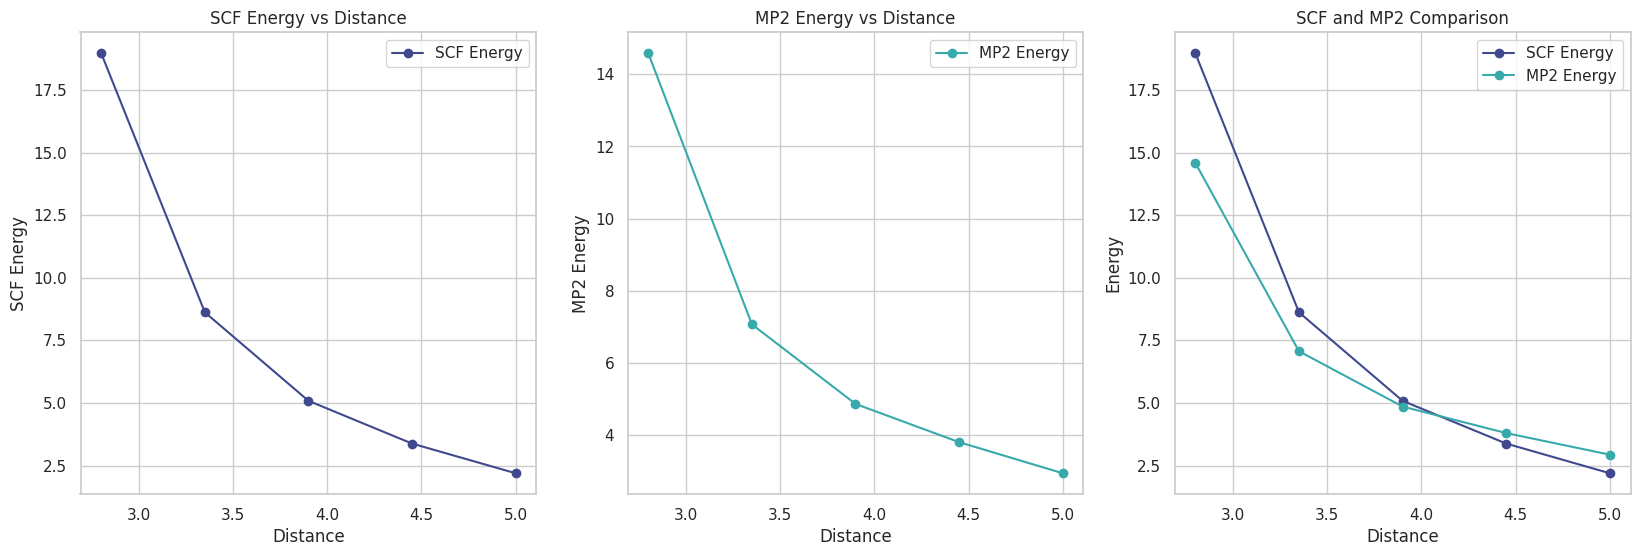

In [39]:
# Read the log file
with open("2H2O.log", 'r') as file:
    content = file.read()

# Extract energy data
distances_scf, energies_scf = extract_energy_data_two_molecules(content, 
    "The Calculated Surface using the SCF energy", "The Calculated Surface using the MP2 energy")

distances_mp2, energies_mp2 = extract_energy_data_two_molecules(content, 
    "The Calculated Surface using the MP2 energy", "--------------------------------")

# Create DataFrames
df_scf_2H2O = pd.DataFrame({'dist': distances_scf, 'E': energies_scf})
df_mp2_2H2O = pd.DataFrame({'dist': distances_mp2, 'E': energies_mp2})


# Save to CSV files
df_scf_2H2O.to_csv('outAr2_SCF_Energy.csv', index=False)
df_mp2_2H2O.to_csv('outAr2_MP2_Energy.csv', index=False)

print("CSV files have been generated.")

import matplotlib.pyplot as plt

# Reference energies (in Hartree)
E1rhf = -76.056961148
E1mp2 = -76.318657691

# Conversion factor from Hartree to kJ/mol
hartree_to_kjmol = 2625.6

# Calculate relative energies
df_scf_2H2O['Interaction_Energy'] = (df_scf_2H2O['E'] - 2 * E1rhf)*hartree_to_kjmol
df_mp2_2H2O['Interaction_Energy'] = (df_mp2_2H2O['E'] - 2 * E1mp2)*hartree_to_kjmol

sns.set(style='whitegrid')
palette = sns.color_palette('mako', 2)

plt.figure(figsize=(20, 6))

# Plot SCF energy data in the first subplot
plt.subplot(1, 3, 1)
plt.plot(df_scf_2H2O['dist'], df_scf_2H2O['Interaction_Energy'], marker='o', color=palette[0], label='SCF Energy')
plt.title('SCF Energy vs Distance')
plt.xlabel('Distance')
plt.ylabel('SCF Energy')
plt.grid(True)
plt.legend()

# Plot MP2 energy data in the second subplot
plt.subplot(1, 3, 2)
plt.plot(df_mp2_2H2O['dist'], df_mp2_2H2O['Interaction_Energy'], marker='o', color=palette[1], label='MP2 Energy')
plt.title('MP2 Energy vs Distance')
plt.xlabel('Distance')
plt.ylabel('MP2 Energy')
plt.grid(True)
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(df_scf_2H2O['dist'], df_scf_2H2O['Interaction_Energy'], marker='o',color=palette[0], label='SCF Energy')
plt.plot(df_mp2_2H2O['dist'], df_mp2_2H2O['Interaction_Energy'], marker='o', color=palette[1], label='MP2 Energy')
plt.title('SCF and MP2 Comparison')
plt.xlabel('Distance')
plt.ylabel('Energy')
plt.grid(True)
plt.legend()

# Save the combined figure
plt.savefig('Energy_Plots_Side_by_Side.png')
plt.show()


### Three $H_2 O$ Molecules Simulation

In [40]:
with open('3H2O.inp', 'w') as f:
    code = f'''
    
    ! HF MP2 cc-pVTZ LooseSCF Opt {pal}
     
    * xyz 0 1
    O       0.000000     0.000000     0.000000 
    H       -0.886668    0.362746     0.000000
    H       -0.129187    -0.949250    0.000000

    O       2.800000     0.000000     0.000000
    H       3.686668     0.362746     0.000000
    H       2.929187     -0.949250    0.000000
    
    O       1.400000     2.424871     0.000000
    H       0.642519     3.011375     0.000000
    H       2.157481     3.011375     0.000000
    *

    %geom
        Constraints
            {{ B 0 1 C }}  
            {{ B 0 2 C }} 
            {{ B 3 4 C }}
            {{ B 3 5 C }}
            {{ B 6 7 C }}
            {{ B 6 8 C }}
            {{ A 1 0 2 C }}
            {{ A 4 3 5 C }}
            {{ A 1 0 3 C }}
            {{ A 4 3 0 C }}
            {{ A 7 6 8 C }}
            {{ A 7 6 3 C }}
        end
        Scan
            B 0 3 = 2.8, 5, 5  # Vary the O-O distance
            B 6 3 = 2.8, 5, 5  # Vary the O-O distance
            B 0 6 = 2.8, 5, 5  # Vary the O-O distance
        end
    end
 
    %mp2
        Density relaxed
    end

    %scf
        ConvForced true  # Ensure SCF convergence
    end

    '''
    with open('3H2O.inp', 'w') as f:
        f.write(code)


In [41]:
run_simulation('3H2O.inp')

Simulation skipped for 3H2O.inp
If you want to run the simulation, set the simulations variable to True and run the cell again.


#### Plotting the results

CSV files have been generated.


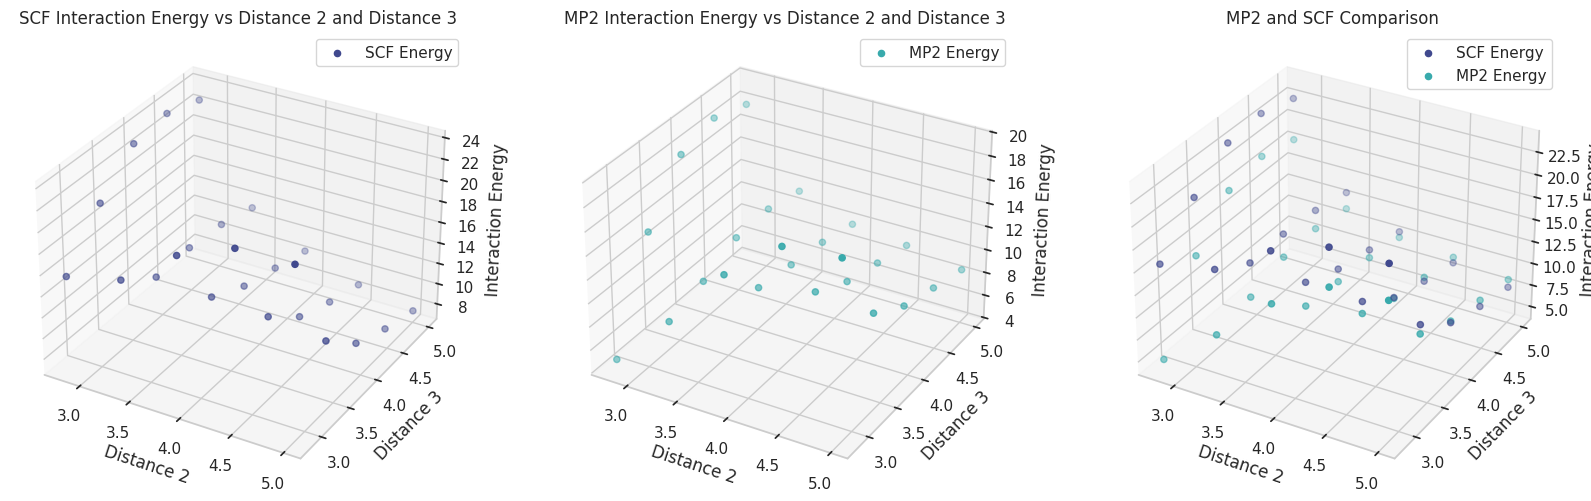

In [42]:
constantDist = 5
# Read the log file

import re
import pandas as pd

with open('3H2O.log', 'r') as file:
    content = file.read()

# Extract energy data
distance_1_scf, distance_2_scf, distance_3_scf, energies_scf_3H2O = extract_energy_data_three_molecules(content, 
    "The Calculated Surface using the SCF energy", "The Calculated Surface using the MP2 energy")

distance_1_mp2, distance_2_mp2, distance_3_mp2, energies_mp2_3H2O = extract_energy_data_three_molecules(content,
    "The Calculated Surface using the MP2 energy", "--------------------------------")

# Create DataFrames
df_scf_3H2O = pd.DataFrame({'dist_1': distance_1_scf,'dist_2': distance_2_scf, 'dist_3': distance_3_scf, 'E': energies_scf_3H2O})
df_mp2_3H2O = pd.DataFrame({'dist_1': distance_1_mp2,'dist_2': distance_2_mp2, 'dist_3': distance_3_mp2, 'E': energies_mp2_3H2O})

#df_mp2 = pd.DataFrame({'dist': distances_mp2, 'E': energies_mp2})

# Save to CSV files
df_scf_3H2O.to_csv('3H2O_SCF_Energy.csv', index=False)
df_mp2_3H2O.to_csv('3H2O_MP2_Energy.csv', index=False)


df_scf_3H2O = pd.read_csv('3H2O_SCF_Energy.csv')
df_mp2_3H2O = pd.read_csv('3H2O_MP2_Energy.csv')

print("CSV files have been generated.")

import matplotlib.pyplot as plt

# Reference energies (in Hartree)
E1rhf = -76.056961148
E1mp2 = -76.318657691

# Conversion factor from Hartree to kJ/mol
hartree_to_kjmol = 2625.6

# Calculate relative energies
df_scf_3H2O['Interaction_Energy'] = (df_scf_3H2O['E'] - 3 * E1rhf)*hartree_to_kjmol
df_mp2_3H2O['Interaction_Energy'] = (df_mp2_3H2O['E'] - 3 * E1mp2)*hartree_to_kjmol

# Let us select only the rows of the energies whete distance_1 is equal to constantDist
df_scf_toplot = df_scf_3H2O[df_scf_3H2O['dist_1'] == constantDist]
df_mp2_toplot= df_mp2_3H2O[df_mp2_3H2O['dist_1'] == constantDist]

# now using a 3d representation plot the energies as a function of the other two distances
# Plot SCF energy data
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

sns.set(style='whitegrid')
palette = sns.color_palette('mako', 2)

# Create a figure with two subplots side by side
fig = plt.figure(figsize=(20, 6))

# Plot SCF energy data in the first subplot
ax1 = fig.add_subplot(131, projection='3d')
ax1.scatter(df_scf_toplot['dist_2'], df_scf_toplot['dist_3'], df_scf_toplot['Interaction_Energy'], color=palette[0], marker='o', label='SCF Energy')
ax1.set_xlabel('Distance 2')
ax1.set_ylabel('Distance 3')
ax1.set_zlabel('Interaction Energy')
ax1.set_title('SCF Interaction Energy vs Distance 2 and Distance 3')
ax1.legend()

# Plot MP2 energy data in the second subplot
ax2 = fig.add_subplot(132, projection='3d')
ax2.scatter(df_mp2_toplot['dist_2'], df_mp2_toplot['dist_3'], df_mp2_toplot['Interaction_Energy'], color=palette[1], marker='o', label='MP2 Energy')
ax2.set_xlabel('Distance 2')
ax2.set_ylabel('Distance 3')
ax2.set_zlabel('Interaction Energy')
ax2.set_title('MP2 Interaction Energy vs Distance 2 and Distance 3')
ax2.legend()

ax3 = fig.add_subplot(133, projection='3d')
ax3.scatter(df_scf_toplot['dist_2'], df_scf_toplot['dist_3'], df_scf_toplot['Interaction_Energy'], color=palette[0], marker='o', label='SCF Energy')
ax3.scatter(df_mp2_toplot['dist_2'], df_mp2_toplot['dist_3'], df_mp2_toplot['Interaction_Energy'], color=palette[1], marker='o', label='MP2 Energy')
ax3.set_xlabel('Distance 2')
ax3.set_ylabel('Distance 3')
ax3.set_zlabel('Interaction Energy')
ax3.set_title('MP2 and SCF Comparison')
ax3.legend()


# Save the combined figure
plt.savefig('3D_Plot_Side_by_Side.png')
plt.show()

### Evaluation of Energy Additivity in the $H_2 O$ Case

In [43]:
print_differences = False

for index,row in df_scf_3H2O.iterrows():
    dist1 = row['dist_1']
    dist2 = row['dist_2']
    dist3 = row['dist_3']
    energy = row['Interaction_Energy']

    # Calculate the sum of energies from df_scf_2H2O for the three distances
    energy_sum_2H2O = (
        df_scf_2H2O[df_scf_2H2O['dist'] == dist1]['Interaction_Energy'].values[0] +
        df_scf_2H2O[df_scf_2H2O['dist'] == dist2]['Interaction_Energy'].values[0] +
        df_scf_2H2O[df_scf_2H2O['dist'] == dist3]['Interaction_Energy'].values[0]
    )

    if print_differences:
        # Print the interaction energy from df_scf and the sum from df_scf_2H2O
        print(f"Distances: ({dist1}, {dist2}, {dist3})")
        print(f"Interaction Energy (df_scf): {energy}")
        print(f"Sum of Interaction Energies (df_scf_2H2O): {energy_sum_2H2O}")
        print(f"Non-additivity check: {energy} != {energy_sum_2H2O}\n")


In [44]:
print_differences = False

for index,row in df_mp2_3H2O.iterrows():
    dist1 = row['dist_1']
    dist2 = row['dist_2']
    dist3 = row['dist_3']
    energy = row['Interaction_Energy']

    # Calculate the sum of energies from df_mp2_2H2O for the three distances
    energy_sum_2H2O = (
        df_mp2_2H2O[df_mp2_2H2O['dist'] == dist1]['Interaction_Energy'].values[0] +
        df_mp2_2H2O[df_mp2_2H2O['dist'] == dist2]['Interaction_Energy'].values[0] +
        df_mp2_2H2O[df_mp2_2H2O['dist'] == dist3]['Interaction_Energy'].values[0]
    )

    if print_differences:
        # Print the interaction energy from df_mp2 and the sum from df_mp2_2H2O
        print(f"Distances: ({dist1}, {dist2}, {dist3})")
        print(f"Interaction Energy (df_mp2): {energy}")
        print(f"Sum of Interaction Energies (df_mp2_2H2O): {energy_sum_2H2O}")
        print(f"Non-additivity check: {energy} != {energy_sum_2H2O}\n")

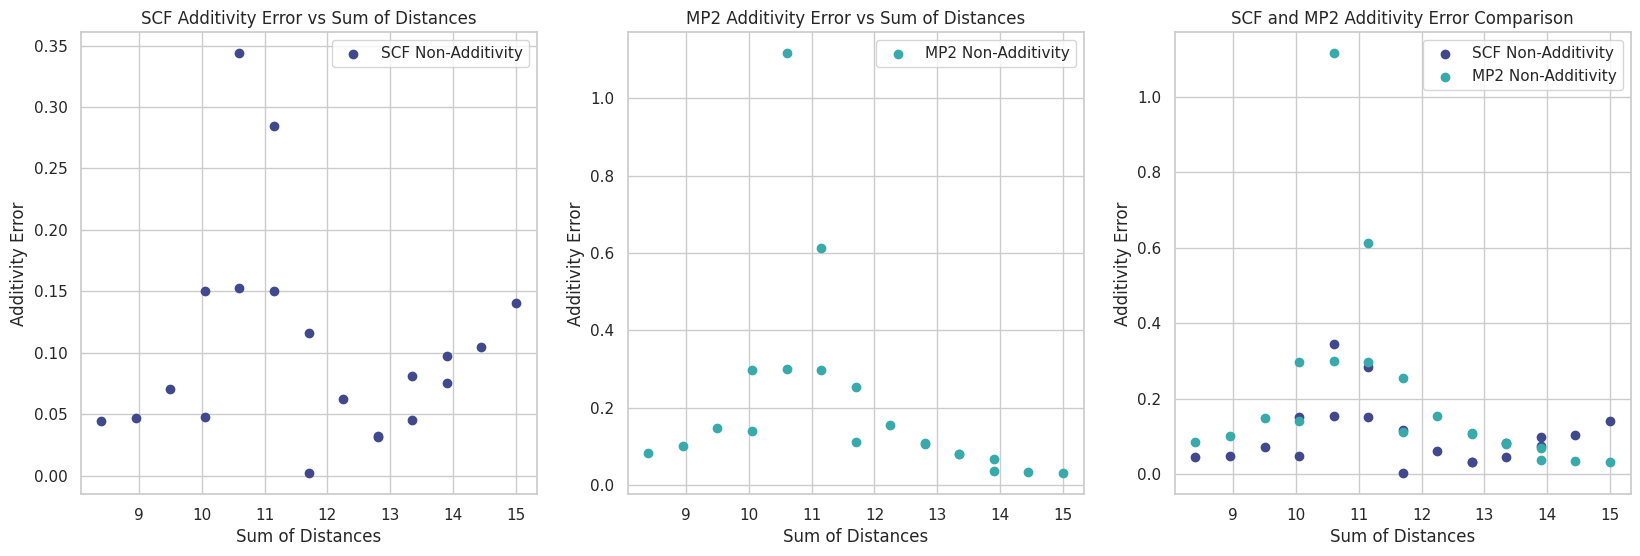

In [45]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the non-additivity for SCF data using .apply() to ensure proper alignment
df_scf_3H2O['Non-Additivity'] = df_scf_3H2O.apply(
    lambda row: row['Interaction_Energy'] - (
        df_scf_2H2O[df_scf_2H2O['dist'] == row['dist_1']]['Interaction_Energy'].values[0] +
        df_scf_2H2O[df_scf_2H2O['dist'] == row['dist_2']]['Interaction_Energy'].values[0] +
        df_scf_2H2O[df_scf_2H2O['dist'] == row['dist_3']]['Interaction_Energy'].values[0]
    ),
    axis=1
)

df_scf_3H2O['Non-Additivity'] = df_scf_3H2O['Non-Additivity'].apply(lambda x: abs(x)) / np.abs(df_scf_3H2O['Interaction_Energy'])

# Calculate the non-additivity for MP2 data using .apply() to ensure proper alignment
df_mp2_3H2O['Non-Additivity'] = df_mp2_3H2O.apply(
    lambda row: row['Interaction_Energy'] - (
        df_mp2_2H2O[df_mp2_2H2O['dist'] == row['dist_1']]['Interaction_Energy'].values[0] +
        df_mp2_2H2O[df_mp2_2H2O['dist'] == row['dist_2']]['Interaction_Energy'].values[0] +
        df_mp2_2H2O[df_mp2_2H2O['dist'] == row['dist_3']]['Interaction_Energy'].values[0]
    ),
    axis=1
)

df_mp2_3H2O['Non-Additivity'] = df_mp2_3H2O['Non-Additivity'].apply(lambda x: abs(x)) / np.abs(df_mp2_3H2O['Interaction_Energy'])
# Calculate the sum of distances for SCF data
df_scf_3H2O['Sum_Distances'] = df_scf_3H2O['dist_1'] + df_scf_3H2O['dist_2'] + df_scf_3H2O['dist_3']

# Calculate the sum of distances for MP2 data
df_mp2_3H2O['Sum_Distances'] = df_mp2_3H2O['dist_1'] + df_mp2_3H2O['dist_2'] + df_mp2_3H2O['dist_3']

df_scf_3H2O_toplot = df_scf_3H2O.groupby('Sum_Distances')['Non-Additivity'].mean().reset_index()
df_mp2_3H2O_toplot = df_mp2_3H2O.groupby('Sum_Distances')['Non-Additivity'].mean().reset_index()

sns.set(style='whitegrid')
palette = sns.color_palette('mako', 2)

# Plot the non-additivity as a function of the sum of the distances
plt.figure(figsize=(20, 6))

# Plot SCF non-additivity data in the first subplot as a scatter plot
plt.subplot(1, 3, 1)
plt.scatter(df_scf_3H2O_toplot['Sum_Distances'], df_scf_3H2O_toplot['Non-Additivity'], marker='o', color=palette[0], label='SCF Non-Additivity')
plt.title('SCF Additivity Error vs Sum of Distances')
plt.xlabel('Sum of Distances')
plt.ylabel('Additivity Error')
plt.grid(True)
plt.legend()

# Plot MP2 non-additivity data in the second subplot as a scatter plot
plt.subplot(1, 3, 2)
plt.scatter(df_mp2_3H2O_toplot['Sum_Distances'], df_mp2_3H2O_toplot['Non-Additivity'], marker='o', color=palette[1], label='MP2 Non-Additivity')
plt.title('MP2 Additivity Error vs Sum of Distances')
plt.xlabel('Sum of Distances')
plt.ylabel('Additivity Error')
plt.grid(True)
plt.legend()

plt.subplot(1, 3, 3)
plt.scatter(df_scf_3H2O_toplot['Sum_Distances'], df_scf_3H2O_toplot['Non-Additivity'], marker='o',color=palette[0], label='SCF Non-Additivity')
plt.scatter(df_mp2_3H2O_toplot['Sum_Distances'], df_mp2_3H2O_toplot['Non-Additivity'], marker='o', color=palette[1], label='MP2 Non-Additivity')
plt.title('SCF and MP2 Additivity Error Comparison')
plt.xlabel('Sum of Distances')
plt.ylabel('Additivity Error')
plt.grid(True)
plt.legend()

# Save the combined figure
plt.savefig('Non-Additivity_vs_Sum_of_Distances_Scatter.png')

plt.show()

In [46]:
print("Error norm for SCF data:", round(df_scf_3H2O['Non-Additivity'].mean() * 100), "%")
print("Error norm for MP2 data:", round(df_mp2_3H2O['Non-Additivity'].mean() * 100), "%")

# evaluating only the points with sumdistance > 13
print ("----------------------------------------------------")
print("Error norm for SCF data (Sum of Distances > 14):", round(df_scf_3H2O[df_scf_3H2O['Sum_Distances'] > 14]['Non-Additivity'].mean() * 100), "%")
print("Error norm for MP2 data (Sum of Distances > 14):", round(df_mp2_3H2O[df_mp2_3H2O['Sum_Distances'] > 14]['Non-Additivity'].mean() * 100), "%")

Error norm for SCF data: 12 %
Error norm for MP2 data: 28 %
----------------------------------------------------
Error norm for SCF data (Sum of Distances > 14): 11 %
Error norm for MP2 data (Sum of Distances > 14): 3 %


### Comments on the $H_2 O$ Molecules Simulation
In this case the approximation of the three molecules case is quite good for both SCF and MP2 methods. The additivity erros are significantly lower that in the HCl case but higher than in the Ar case. The error on the applroximation of the SCF energy is anso in this case lower (12%) than the MP2 one (28%). Interestingly, at larger distances, the trend reverses, with the MP2 error becoming smaller than the SCF error. This suggests that the electron correlation effects captured by MP2, which are significant at shorter distances, become less critical as the distance increases. Therefore, at higher distances, the MP2 energy can be more effectively approximated based on the two-molecule system results than the SCF energy. 

## Hartree-Fock plus London Dispersion Simulation

In this section, we explore the interactions between argon atoms using the **Hartree-Fock plus London Dispersion** method, which enhances the standard Hartree-Fock (HF) approach by adding a correction for dispersion forces. The standard Hartree-Fock method focuses on the mean-field approximation of electron-electron interactions, but it neglects correlation effects between electrons, including the long-range interactions known as London dispersion forces. These dispersion forces, also referred to as van der Waals interactions, are especially important in weakly interacting systems like argon atoms.

The Hartree-Fock plus London Dispersion method improves upon pure Hartree-Fock by adding an empirical correction to account for these dispersion forces. This allows it to better capture interactions in non-covalently bonded systems such as noble gases.

In contrast:
- **SCF (Self-Consistent Field)** is often synonymous with Hartree-Fock in this context, and like HF, it does not inherently include dispersion forces. SCF captures the mean-field approximation but fails to accurately represent electron correlation, leading to inaccuracies when dealing with weak interactions like those between argon atoms.
- **MP2 (Møller-Plesset second-order perturbation theory)** goes beyond Hartree-Fock by including electron correlation effects through perturbation theory. MP2 is more accurate in describing the dispersion interactions compared to Hartree-Fock, as it takes into account both the dynamic correlation of electrons and the dispersion forces naturally.

By comparing the energy results of three argon atoms using the Hartree-Fock plus London Dispersion method against those obtained from SCF and MP2, we aim to evaluate how well this combined method captures both dispersion forces and electron correlation. Specifically, it will highlight where the standard Hartree-Fock (SCF) method falls short and where MP2 excels in describing weak intermolecular forces.

In [47]:
for dist in np.arange(2.8, 5.1, 0.2):
    dist = round(dist, 3)
    input_file = f'AR2LD_{dist}.inp'
    with open(input_file, 'w') as f:
        code = f'''# MP2 scan of the potential energy curve for Ar...Ar
        ! HFLD aug-cc-pvdz aug-cc-pvdz/C verytightscf
        *xyz 0 1
        Ar(1)	0.000000000000000	0.000000000000000	0.00000000000000
        Ar(2)	{dist}	0.000000000000000	0.00000000000000
        *'''
        with open(input_file, 'w') as f:
            f.write(code)

        run_simulation(input_file)

Simulation skipped for AR2LD_2.8.inp
If you want to run the simulation, set the simulations variable to True and run the cell again.
Simulation skipped for AR2LD_3.0.inp
If you want to run the simulation, set the simulations variable to True and run the cell again.
Simulation skipped for AR2LD_3.2.inp
If you want to run the simulation, set the simulations variable to True and run the cell again.
Simulation skipped for AR2LD_3.4.inp
If you want to run the simulation, set the simulations variable to True and run the cell again.
Simulation skipped for AR2LD_3.6.inp
If you want to run the simulation, set the simulations variable to True and run the cell again.
Simulation skipped for AR2LD_3.8.inp
If you want to run the simulation, set the simulations variable to True and run the cell again.
Simulation skipped for AR2LD_4.0.inp
If you want to run the simulation, set the simulations variable to True and run the cell again.
Simulation skipped for AR2LD_4.2.inp
If you want to run the simulatio

In [48]:
import pandas as pd
import re
import glob

data = []

for file_name in glob.glob("AR2LD_*.log"):
    match = re.search(r'AR2LD_(\d+\.\d+)\.log', file_name)
    if match:
        distance = match.group(1)
        
        with open(file_name, 'r') as file:
            content = file.read()
            
            energy_match = re.search(r'FINAL SINGLE POINT ENERGY\s+(-?\d+\.\d+)', content)
            if energy_match:
                energy = energy_match.group(1)
                data.append({'dist': float(distance), 'E': float(energy)})

hfld2Ar = pd.DataFrame(data)

hfld2Ar.to_csv('hfld2Ar.csv', index=False)

hfld2Ar = hfld2Ar.sort_values('dist')

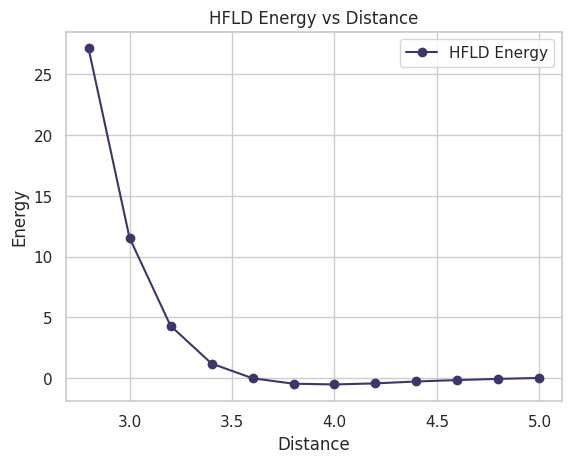

In [49]:
import matplotlib.pyplot as plt

# Reference energies (in Hartree)
E1ld = -526.8010265

# Conversion factor from Hartree to kJ/mol
hartree_to_kjmol = 2625.6

# Calculate relative energies
hfld2Ar['Interaction_Energy'] = (hfld2Ar['E'] - 2 * E1ld)*hartree_to_kjmol

sns.set(style='whitegrid')
palette = sns.color_palette('mako', 3)

# Plot SCF energy data in the first subplot
plt.plot(hfld2Ar['dist'], hfld2Ar['Interaction_Energy'], marker='o', color=palette[0], label='HFLD Energy')
plt.title('HFLD Energy vs Distance')
plt.xlabel('Distance')
plt.ylabel('Energy')
plt.grid(True)
plt.legend()



In [50]:
with open('AR2forLDevaluation.inp', 'w') as f:
    code = f'''# MP2 scan of the potential energy curve for Ar...Ar
    ! HF MP2 cc-pVTZ TightSCF Opt {pal}

    * xyz 0 1
    Ar      0.000000     0.000000     0.000000
    Ar      2.800000     0.000000     0.000000
    *

    %geom
        Constraints
        end
        Scan
            B 0 1 = 2.8, 5, 12   
        end
    end

    %mp2
        Density relaxed
    end

    %scf
        ConvForced true  # Ensure SCF convergence
    end'''
    with open('AR2forLDevaluation.inp', 'w') as f:
        f.write(code)

In [51]:
run_simulation('AR2forLDevaluation.inp')

Simulation skipped for AR2forLDevaluation.inp
If you want to run the simulation, set the simulations variable to True and run the cell again.


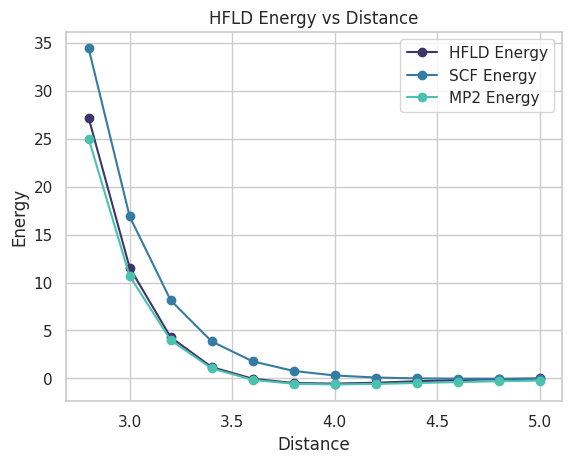

In [52]:
# Read the log file
with open("AR2forLDevaluation.log", 'r') as file:
    content = file.read()

# Extract energy data
distances_scf, energies_scf = extract_energy_data_two_molecules(content, 
    "The Calculated Surface using the SCF energy", "The Calculated Surface using the MP2 energy")

distances_mp2, energies_mp2 = extract_energy_data_two_molecules(content, 
    "The Calculated Surface using the MP2 energy", "--------------------------------")

# Create DataFrames
df_scf_2Ar = pd.DataFrame({'dist': distances_scf, 'E': energies_scf})
df_mp2_2Ar = pd.DataFrame({'dist': distances_mp2, 'E': energies_mp2})

E1rhf = -526.8131337981299112
E1mp2 = -527.019043233

# Conversion factor from Hartree to kJ/mol
hartree_to_kjmol = 2625.6

# Calculate relative energies
df_scf_2Ar['Interaction_Energy'] = (df_scf_2Ar['E'] - 2 * E1rhf)*hartree_to_kjmol
df_mp2_2Ar['Interaction_Energy'] = (df_mp2_2Ar['E'] - 2 * E1mp2)*hartree_to_kjmol

plt.plot(hfld2Ar['dist'], hfld2Ar['Interaction_Energy'], marker='o', color=palette[0], label='HFLD Energy')
plt.plot(df_scf_2Ar['dist'], df_scf_2Ar['Interaction_Energy'], marker='o', color=palette[1], label='SCF Energy')
plt.plot(df_mp2_2Ar['dist'], df_mp2_2Ar['Interaction_Energy'], marker='o', color=palette[2], label='MP2 Energy')
plt.title('HFLD Energy vs Distance')
plt.xlabel('Distance')
plt.ylabel('Energy')
plt.grid(True)
plt.legend()


The plot illustrates the energy variations of two argon atoms as a function of their distance, ranging from 2.8 Å to 5 Å, comparing results from different computational methods: SCF, HFLD, and MP2. As expected, the SCF energy is consistently higher (less negative) than both HFLD and MP2 due to its neglect of London dispersion interactions. The HFLD method exhibits energy values that are slightly above those of MP2, reflecting its inclusion of dispersion corrections while still being less accurate than the full correlation provided by MP2.

In [53]:
import math
import numpy as np

def find_coordinates(a, b, c):
    Ax, Ay = 0, 0
    Bx, By = c, 0

    Cx = (b**2 - a**2 + c**2) / (2 * c)

    y_square = b**2 - Cx**2
    if y_square < 0:
        raise ValueError("The given lengths of the sides do not form a triangle.")
    
    Cy = math.sqrt(y_square)

    return Ax, Ay, Bx, By, Cx, Cy
    
for dist1 in np.arange(2.8, 5.1, 0.4):
    for dist2 in np.arange(2.8, 5.1, 0.4):
        for dist3 in np.arange(2.8, 5.1, 0.4):
            dist1 = round(dist1, 3)
            dist2 = round(dist2, 3)
            dist3 = round(dist3, 3)
            Ax, Ay, Bx, By, Cx, Cy = find_coordinates(dist1, dist2, dist3)
            input_file = f'AR3LD_{dist1}_{dist2}_{dist3}.inp'
            with open(input_file, 'w') as f:
                code = f'''# MP2 scan of the potential energy curve for Ar...Ar
                ! HFLD aug-cc-pvdz aug-cc-pvdz/C verytightscf
                *xyz 0 1
                Ar(1)	{Ax}    {Ay}	0.00000000000000
                Ar(2)	{Bx}	{By}    0.00000000000000
                Ar(3)	{Cx}	{Cy}    0.00000000000000
                *'''
                with open(input_file, 'w') as f:
                    f.write(code)

                run_simulation(input_file)

Simulation skipped for AR3LD_2.8_2.8_2.8.inp
If you want to run the simulation, set the simulations variable to True and run the cell again.
Simulation skipped for AR3LD_2.8_2.8_3.2.inp
If you want to run the simulation, set the simulations variable to True and run the cell again.
Simulation skipped for AR3LD_2.8_2.8_3.6.inp
If you want to run the simulation, set the simulations variable to True and run the cell again.
Simulation skipped for AR3LD_2.8_2.8_4.0.inp
If you want to run the simulation, set the simulations variable to True and run the cell again.
Simulation skipped for AR3LD_2.8_2.8_4.4.inp
If you want to run the simulation, set the simulations variable to True and run the cell again.
Simulation skipped for AR3LD_2.8_2.8_4.8.inp
If you want to run the simulation, set the simulations variable to True and run the cell again.
Simulation skipped for AR3LD_2.8_3.2_2.8.inp
If you want to run the simulation, set the simulations variable to True and run the cell again.
Simulation sk

In [54]:
import pandas as pd
import re
import glob

data = []

for file_name in glob.glob("AR3LD_*.log"):
    # Updated regex to capture three distances
    match = re.search(r'AR3LD_(\d+\.\d+)_(\d+\.\d+)_(\d+\.\d+)\.log', file_name)
    if match:
        # Extracting three distances
        distance1 = match.group(1)
        distance2 = match.group(2)
        distance3 = match.group(3)
        
        with open(file_name, 'r') as file:
            content = file.read()
            
            # Capture the energy value
            energy_match = re.search(r'FINAL SINGLE POINT ENERGY\s+(-?\d+\.\d+)', content)
            if energy_match:
                energy = energy_match.group(1)
                # Append a dictionary for each distance value
                data.append({'dist1': float(distance1), 'dist2': float(distance2), 'dist3': float(distance3), 'E': float(energy)})

# Create a DataFrame with the new structure
hfld3Ar = pd.DataFrame(data)

# Save the DataFrame to a CSV file
hfld3Ar.to_csv('hfld3Ar.csv', index=False)

# Sort the DataFrame by the first distance value (or adjust as needed)
hfld3Ar = hfld3Ar.sort_values('dist3')
hfld3Ar = hfld3Ar.sort_values('dist2')
hfld3Ar = hfld3Ar.sort_values('dist1')

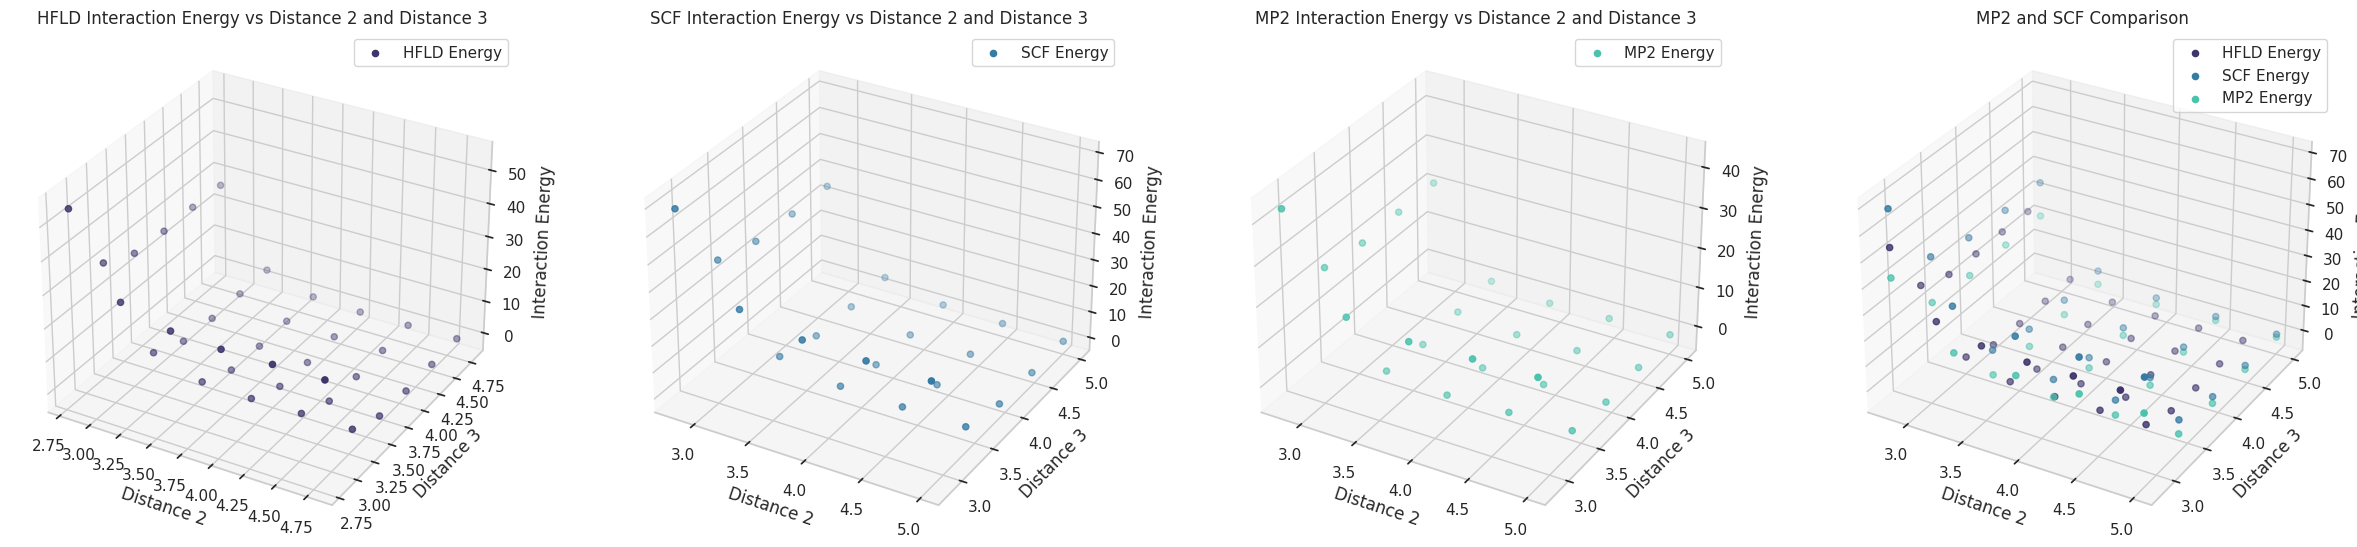

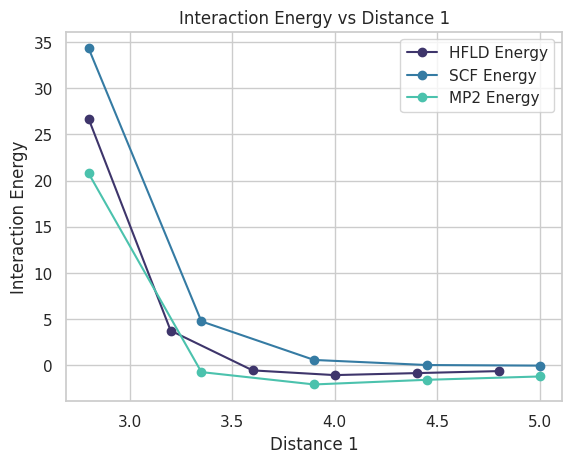

In [55]:
constantDisthfld = 4.8
constantDist = 5

import re
import pandas as pd

with open('Ar3.log', 'r') as file:
    content = file.read()

# Extract energy data
distance_1_scf, distance_2_scf, distance_3_scf, energies_scf_3Ar = extract_energy_data_three_molecules(content, 
    "The Calculated Surface using the SCF energy", "The Calculated Surface using the MP2 energy")

distance_1_mp2, distance_2_mp2, distance_3_mp2, energies_mp2_3Ar = extract_energy_data_three_molecules(content,
    "The Calculated Surface using the MP2 energy", "--------------------------------")

# Create DataFrames
df_scf_3Ar = pd.DataFrame({'dist_1': distance_1_scf,'dist_2': distance_2_scf, 'dist_3': distance_3_scf, 'E': energies_scf_3Ar})
df_mp2_3Ar = pd.DataFrame({'dist_1': distance_1_mp2,'dist_2': distance_2_mp2, 'dist_3': distance_3_mp2, 'E': energies_mp2_3Ar})

#df_mp2 = pd.DataFrame({'dist': distances_mp2, 'E': energies_mp2})

import matplotlib.pyplot as plt

# Reference energies (in Hartree)
E1rhf = -526.813352170
E1mp2 = -527.024283310

# Conversion factor from Hartree to kJ/mol
hartree_to_kjmol = 2625.6

# Calculate relative energies
df_scf_3Ar['Interaction_Energy'] = (df_scf_3Ar['E'] - 3 * E1rhf)*hartree_to_kjmol
df_mp2_3Ar['Interaction_Energy'] = (df_mp2_3Ar['E'] - 3 * E1mp2)*hartree_to_kjmol

# Let us select only the rows of the energies whete distance_1 is equal to constantDist
df_scf_toplot = df_scf_3Ar[df_scf_3Ar['dist_1'] == constantDist]
df_mp2_toplot= df_mp2_3Ar[df_mp2_3Ar['dist_1'] == constantDist]


# Reference energies (in Hartree)
E1hfld = -526.8010265

# Conversion factor from Hartree to kJ/mol
hartree_to_kjmol = 2625.6

# Calculate relative energies
hfld3Ar['Interaction_Energy'] = (hfld3Ar['E'] - 3 * E1hfld)*hartree_to_kjmol

# Let us select only the rows of the energies whete distance_1 is equal to constantDist
df_hfld_toplot = hfld3Ar[hfld3Ar['dist1'] == constantDisthfld]

# now using a 3d representation plot the energies as a function of the other two distances
# Plot SCF energy data
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

sns.set(style='whitegrid')
palette = sns.color_palette('mako', 3)

# Create a figure with two subplots side by side
fig = plt.figure(figsize=(30, 9))

ax1 = fig.add_subplot(141, projection='3d')
ax1.scatter(df_hfld_toplot['dist2'], df_hfld_toplot['dist3'], df_hfld_toplot['Interaction_Energy'], color=palette[0], marker='o', label='HFLD Energy')
ax1.set_xlabel('Distance 2')
ax1.set_ylabel('Distance 3')
ax1.set_zlabel('Interaction Energy')
ax1.set_title('HFLD Interaction Energy vs Distance 2 and Distance 3')
ax1.legend()


# Plot SCF energy data in the first subplot
ax2 = fig.add_subplot(142, projection='3d')
ax2.scatter(df_scf_toplot['dist_2'], df_scf_toplot['dist_3'], df_scf_toplot['Interaction_Energy'], color=palette[1], marker='o', label='SCF Energy')
ax2.set_xlabel('Distance 2')
ax2.set_ylabel('Distance 3')
ax2.set_zlabel('Interaction Energy')
ax2.set_title('SCF Interaction Energy vs Distance 2 and Distance 3')
ax2.legend()

# Plot MP2 energy data in the second subplot
ax3 = fig.add_subplot(143, projection='3d')
ax3.scatter(df_mp2_toplot['dist_2'], df_mp2_toplot['dist_3'], df_mp2_toplot['Interaction_Energy'], color=palette[2], marker='o', label='MP2 Energy')
ax3.set_xlabel('Distance 2')
ax3.set_ylabel('Distance 3')
ax3.set_zlabel('Interaction Energy')
ax3.set_title('MP2 Interaction Energy vs Distance 2 and Distance 3')
ax3.legend()

ax4 = fig.add_subplot(144, projection='3d')
ax4.scatter(df_hfld_toplot['dist2'], df_hfld_toplot['dist3'], df_hfld_toplot['Interaction_Energy'], color=palette[0], marker='o', label='HFLD Energy')
ax4.scatter(df_scf_toplot['dist_2'], df_scf_toplot['dist_3'], df_scf_toplot['Interaction_Energy'], color=palette[1], marker='o', label='SCF Energy')
ax4.scatter(df_mp2_toplot['dist_2'], df_mp2_toplot['dist_3'], df_mp2_toplot['Interaction_Energy'], color=palette[2], marker='o', label='MP2 Energy')
ax4.set_xlabel('Distance 2')
ax4.set_ylabel('Distance 3')
ax4.set_zlabel('Interaction Energy')
ax4.set_title('MP2 and SCF Comparison')
ax4.legend()


# Save the combined figure
plt.savefig('3D_Plot_Side_by_Side.png')
plt.show()


hfld3Ar = hfld3Ar.sort_values('dist3')
# setting alto dist 2 to constantDist and plotting in 2d
df_hfld_toplot2 = hfld3Ar[(hfld3Ar['dist2'] == constantDisthfld) & (hfld3Ar['dist1'] == constantDisthfld)]
df_scf_toplot2 = df_scf_3Ar[(df_scf_3Ar['dist_2'] == constantDist) & (df_scf_3Ar['dist_1'] == constantDist)]
df_mp2_toplot2 = df_mp2_3Ar[(df_mp2_3Ar['dist_2'] == constantDist) & (df_mp2_3Ar['dist_1'] == constantDist)]

# Plot all the energies in the same plot 
plt.plot(df_hfld_toplot2['dist3'], df_hfld_toplot2['Interaction_Energy'], marker='o', color=palette[0], label='HFLD Energy')
plt.plot(df_scf_toplot2['dist_3'], df_scf_toplot2['Interaction_Energy'], marker='o', color=palette[1], label='SCF Energy')
plt.plot(df_mp2_toplot2['dist_3'], df_mp2_toplot2['Interaction_Energy'], marker='o', color=palette[2], label='MP2 Energy')
plt.title('Interaction Energy vs Distance 1')
plt.xlabel('Distance 1')
plt.ylabel('Interaction Energy')
plt.grid(True)
plt.legend()



In the plot above, we can see that the expected behavior of the HFLD method is confirmed also in the case of three argon atoms being positioned between the SCF and MP2 methods.

### Additivity evaluation in the HFLD case

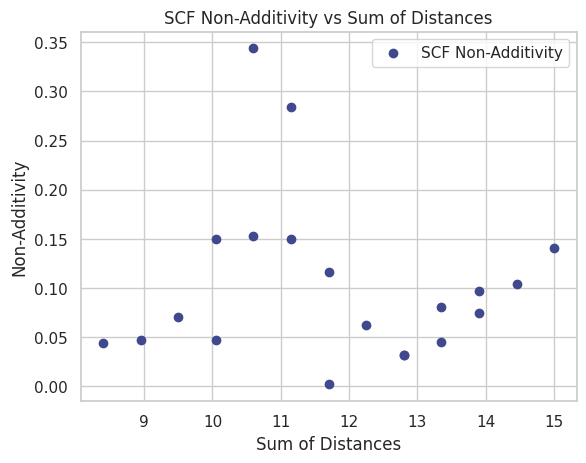

In [56]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate the non-additivity for SCF data using .apply() to ensure proper alignment
hfld3Ar['Non-Additivity'] = hfld3Ar.apply(
    lambda row: row['Interaction_Energy'] - (
        hfld2Ar[hfld2Ar['dist'] == row['dist1']]['Interaction_Energy'].values[0] +
        hfld2Ar[hfld2Ar['dist'] == row['dist2']]['Interaction_Energy'].values[0] +
        hfld2Ar[hfld2Ar['dist'] == row['dist3']]['Interaction_Energy'].values[0]
    ),
    axis=1
)

hfld3Ar['Non-Additivity'] = hfld3Ar['Non-Additivity'].apply(lambda x: abs(x)) / np.abs(hfld3Ar['Interaction_Energy'])

# Calculate the sum of distances for SCF data
hfld3Ar['Sum_Distances'] = hfld3Ar['dist1'] + hfld3Ar['dist2'] + hfld3Ar['dist3']

hfld3Ar_toplot = df_scf_3H2O.groupby('Sum_Distances')['Non-Additivity'].mean().reset_index()

sns.set(style='whitegrid')
palette = sns.color_palette('mako', 2)

# Plot the non-additivity as a function of the sum of the distances
plt.scatter(hfld3Ar_toplot['Sum_Distances'], hfld3Ar_toplot['Non-Additivity'], marker='o', color=palette[0], label='SCF Non-Additivity')
plt.title('SCF Non-Additivity vs Sum of Distances')
plt.xlabel('Sum of Distances')
plt.ylabel('Non-Additivity')
plt.grid(True)
plt.legend()

plt.show()

In [57]:
print("Error norm for SCF data:", round(hfld3Ar['Non-Additivity'].mean() * 100), "%")

Error norm for SCF data: 11 %


### Comments on the Hartree-Fock plus London Dispersion Simulation on Ar Atoms
The Hartree-Fock plus London Dispersion method provides a valuable improvement over the standard Hartree-Fock making the behaviour of the energy more similar to the MP2 one. But differently from the MP2 method it can be approximated by a pairwise additive scheme with a lower error.
This may be the best trade-off between accuracy and possibility of estimation by a pairwise additive scheme.

Summing up the results for the 3 energy estimation methods:
- __SCF (1% error)__ has the lowest additivity error for the argon system, meaning that the energy of the three-argon system can be easily and accurately approximated from the two-argon system using SCF. This is expected since SCF does not account for electron correlation, and in a weakly interacting system like argon, correlation effects are minimal.
- __HFLD (11% error)__ has an additivity error higher than SCF but lower than MP2. This indicates that while HFLD does introduce dispersion corrections to SCF, making it more accurate for weak interactions, it still allows for a relatively good approximation of the three-argon system’s energy based on two-argon data. Its error is significantly smaller than MP2, suggesting that it strikes a balance between correlation effects and dispersion corrections without introducing too much error.
- __MP2 (14% error)__ shows the highest additivity error, which indicates that the energy of the three-argon system is not as easily approximated from the two-argon system when using MP2. This happens because MP2 includes electron correlation effects that are less critical in weakly interacting systems like argon, and these effects might be overestimated.

## Conclusions And Future Work
In this study, I have evaluated the additivity of interaction energies in molecular systems composed of three molecules, focusing on argon atoms, HCl molecules, and $H_2 O$ molecules. By comparing the energy results obtained using Self-Consistent Field (SCF) and Møller-Plesset second-order perturbation theory (MP2), I have highlighted the differences in how these methods capture dispersion and correlation effects, and how these contributions may affect the accuracy of energy additivity at various molecular distances.

The results show that the accuracy of energy additivity depends on the computational method used and the nature of the molecular system. In particular, SCF, which neglects electron correlation, can be more accurately approximated by a pairwise additive scheme in weakly interacting systems like argon atoms. In contrast, MP2, which includes electron correlation, shows higher non-additivity errors, especially in systems with strong intermolecular forces like HCl molecules.

Finally I have introduced the Hartree-Fock plus London Dispersion method, which combines the Hartree-Fock method with London dispersion corrections to improve the accuracy of energy calculations in weakly interacting systems. This method provides a good balance between accuracy and the possibility of estimation by a pairwise additive scheme, making it a promising approach for studying dispersion interactions in molecular systems.

Working on this project made it clear how also simple simulations of three molecules can take a long time to run, even when executed in parallel. As I progressed, it became evident how much using the two molecules simulation data to estimate the three molecules case, without running the simulation, could be useful.

Mathematically speaking if i need to evaluate $n$ different distances between the molecules, the number of steps needed to be performed is $n$ in the two molecules case and $n^{\binom{m}{2}}$ in the $m$ molecules case since I need to evaluate all the possible combinations. 

In future work, it would be interesting to extend this analysis to other molecular systems with different types of interactions to further explore the role of electron correlation and dispersion forces in determining the total energy of the system. Additionally, investigating the performance of other computational methods, such as density functional theory (DFT) or coupled cluster theory, could provide additional insights into the accuracy of energy additivity in molecular systems.

## VMD Visualization
In the following code block, we provide a VMD visualization of all the simulations performed in this notebook. 
This can be useful to better understand the results obtained and to visualize the molecular systems in a more intuitive way.

- [2 Ar atoms simulation](gifs/Ar2.gif)
- [3 Ar atoms simulation](gifs/Ar3.gif)
- [2 HCl molecules simulation](gifs/HCl2.gif)
- [3 HCl molecules simulation](gifs/HCl3.gif)
- [2 H2O molecules simulation](gifs/2H2O.gif)
- [3 H2O molecules simulation](gifs/3H2O.gif)